# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Speedtest Dataset Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

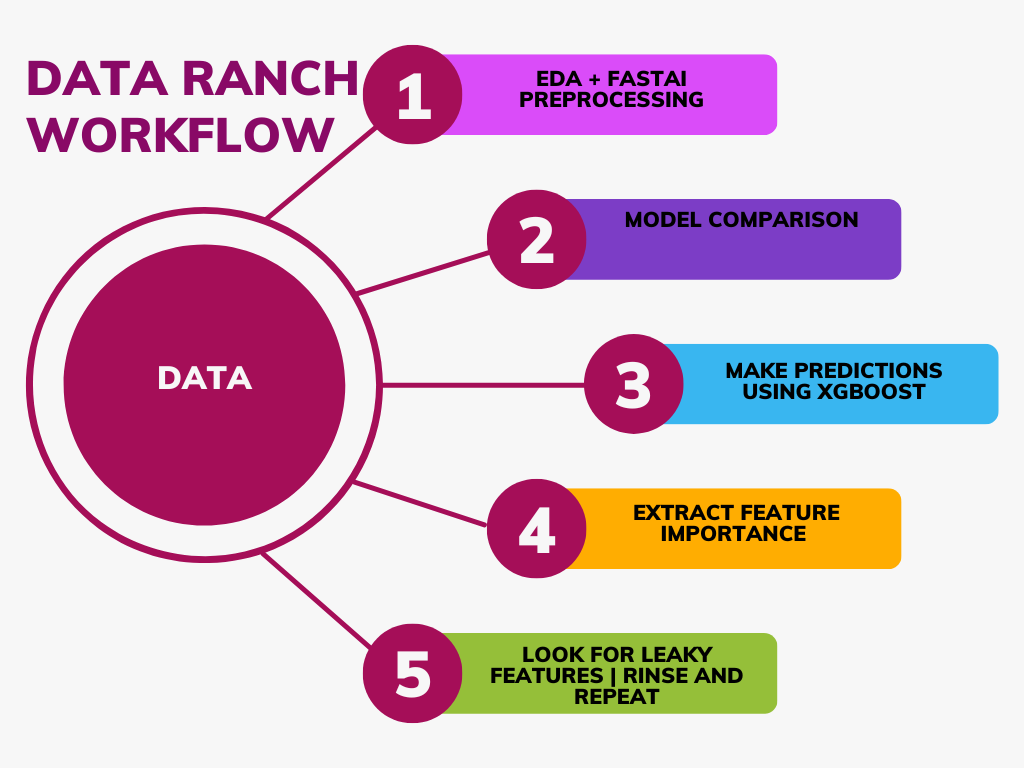

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 74.4 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'speedtest-data-by-ookla'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
df = pd.concat([pd.read_csv(f'{input_dir}/{f}') for f in os.listdir(input_dir)])

param_dir: /kaggle/working/speedtest-data-by-ookla


In [9]:
df

,Name,Number of Records,Devices,Tests,Avg. Avg U Kbps,Avg. Avg D Kbps,Avg Lat Ms,Avg. Pop2005,Rank Upload,Rank Download,Rank Latency,Number of Record
0,Afghanistan,897,"2,312","9,003","3,983","4,823",70,"25,067,407",217,231,33,NaN
1,Åland Islands,284,580,"1,341","58,693","82,767",11,0,27,47,215,NaN
2,Albania,"7,215","38,905","104,752","17,354","25,803",20,"3,153,731",100,127,159,NaN
3,Algeria,"16,056","70,929","413,666","1,508","9,057",43,"32,854,159",234,211,68,NaN
4,American Samoa,80,202,900,"14,345","33,078",18,"64,051",119,104,171,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Åland Islands,219,385,"1,044","72,234","95,708",7,0,29,49,232,NaN
234,Mauritius,"1,886","12,511","37,342","14,497","37,427",7,"1,241,173",136,106,232,NaN
235,Macau,35,"14,566","66,897","143,662","173,198",5,"47,309",7,9,236,NaN
236,Jersey,506,"2,992","10,112","166,408","168,100",4,0,3,11,237,NaN


In [10]:
#handle commas 
if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string() or ',' in df[col].to_string():
            df[col + '_no_comma'] = df[col].str.replace('%', '').str.replace(',', '')
            try:
                df[col + '_no_comma'] = df[col + '_no_comma'].astype(float)
            except:
                pass

In [11]:
df.isna().sum()

Name                             0
Number of Records              450
Devices                          0
Tests                            0
Avg. Avg U Kbps                  0
Avg. Avg D Kbps                  0
Avg Lat Ms                       0
Avg. Pop2005                     0
Rank Upload                      0
Rank Download                    0
Rank Latency                     0
Number of Record              4162
Name_no_comma                    0
Number of Records_no_comma     450
Devices_no_comma                 0
Tests_no_comma                   0
Avg. Avg U Kbps_no_comma         0
Avg. Avg D Kbps_no_comma         0
Avg. Pop2005_no_comma            0
Number of Record_no_comma     4162
dtype: int64

<AxesSubplot:>

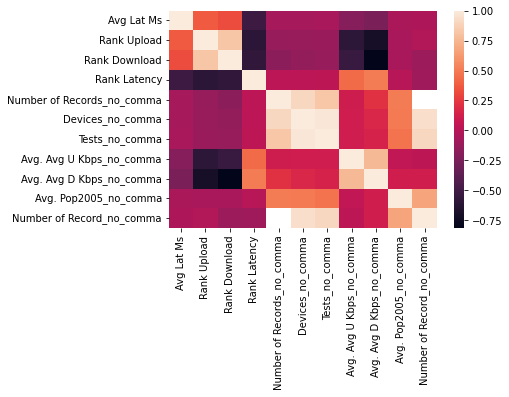

In [12]:
sns.heatmap(df.corr())

In [13]:
df.head().style.background_gradient(cmap = "inferno")

,Name,Number of Records,Devices,Tests,Avg. Avg U Kbps,Avg. Avg D Kbps,Avg Lat Ms,Avg. Pop2005,Rank Upload,Rank Download,Rank Latency,Number of Record,Name_no_comma,Number of Records_no_comma,Devices_no_comma,Tests_no_comma,Avg. Avg U Kbps_no_comma,Avg. Avg D Kbps_no_comma,Avg. Pop2005_no_comma,Number of Record_no_comma
0,Afghanistan,897,"2,312","9,003","3,983","4,823",70,"25,067,407",217,231,33,nan,Afghanistan,897.00,2312.00,9003.00,3983.00,4823.00,25067407.00,nan
1,Åland Islands,284,580,"1,341","58,693","82,767",11,0,27,47,215,nan,Åland Islands,284.00,580.00,1341.00,58693.00,82767.00,0.00,nan
2,Albania,"7,215","38,905","104,752","17,354","25,803",20,"3,153,731",100,127,159,nan,Albania,7215.00,38905.00,104752.00,17354.00,25803.00,3153731.00,nan
3,Algeria,"16,056","70,929","413,666","1,508","9,057",43,"32,854,159",234,211,68,nan,Algeria,16056.00,70929.00,413666.00,1508.00,9057.00,32854159.00,nan
4,American Samoa,80,202,900,"14,345","33,078",18,"64,051",119,104,171,nan,American Samoa,80.00,202.00,900.00,14345.00,33078.00,64051.00,nan


In [14]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Avg Lat Ms,4612.00,58.05,95.37,3.00,25.00,34.00,49.00,873.00
Rank Upload,4612.00,115.86,66.69,1.00,58.00,116.00,173.00,238.00
Rank Download,4612.00,115.87,66.69,1.00,58.00,116.00,173.00,238.00
Rank Latency,4612.00,113.86,65.83,1.00,57.00,113.00,169.00,238.00
Number of Records_no_comma,4162.00,23604.95,97732.24,1.00,176.00,1081.50,11309.75,1713071.00
Devices_no_comma,4612.00,113343.75,439080.40,1.00,407.75,3808.50,49392.25,7961330.00
Tests_no_comma,4612.00,393983.76,1645144.88,1.00,1087.75,11003.00,131900.25,32480378.00
Avg. Avg U Kbps_no_comma,4612.00,18409.94,24039.25,4.00,7624.25,11356.00,17547.00,194192.00
Avg. Avg D Kbps_no_comma,4612.00,39153.63,36555.22,20.00,15277.00,26485.50,48798.00,252896.00
Avg. Pop2005_no_comma,4612.00,26746030.95,117969084.69,0.00,295297.00,3762005.00,13933363.00,1312978855.00


In [15]:
df.columns

Index(['Name', 'Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps',
       'Avg. Avg D Kbps', 'Avg Lat Ms', 'Avg. Pop2005', 'Rank Upload',
       'Rank Download', 'Rank Latency', 'Number of Record', 'Name_no_comma',
       'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma',
       'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma',
       'Avg. Pop2005_no_comma', 'Number of Record_no_comma'],
      dtype='object')

In [16]:
#remove 'Name' as it's a leaky feature
del(df['Name'])

del(df['Number of Record'])

Target Variable: Number of Record_no_comma
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Number of Records_n

 14%|█▍        | 6/42 [00:00<00:00, 58.61it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.007534151201163963, 'Adjusted R-Squared': -0.009726826176574388, 'RMSE': 27148.527303218554, 'Time taken': 0.028955698013305664}
{'Model': 'BaggingRegressor', 'R-Squared': 0.09232802713395472, 'Adjusted R-Squared': 0.09035268007657493, 'RMSE': 25768.008240031864, 'Time taken': 0.04206347465515137}
{'Model': 'BayesianRidge', 'R-Squared': 0.014326357520870525, 'Adjusted R-Squared': 0.012181257101982368, 'RMSE': 26852.390832441237, 'Time taken': 0.00784921646118164}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.05820041101747386, 'Adjusted R-Squared': 0.05615079276071111, 'RMSE': 26247.964876542374, 'Time taken': 0.009843826293945312}
{'Model': 'DummyRegressor', 'R-Squared': -0.0008924466308741774, 'Adjusted R-Squared': -0.0030706674070022366, 'RMSE': 27058.898, 'Time taken': 0.006547451019287109}
{'Model': 'ElasticNet', 'R-Squared': 0.010728283514169212, 'Adjusted R-Squared': 0.008575352683949822, 'RMSE': 26901.356775129785, 'Time taken'

 29%|██▊       | 12/42 [00:01<00:05,  5.61it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.061166253501910184, 'Adjusted R-Squared': 0.05912308974456948, 'RMSE': 26206.603256372724, 'Time taken': 1.4691143035888672}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.008253688523078395, 'Adjusted R-Squared': 0.0060953722848261505, 'RMSE': 26934.98170524944, 'Time taken': 0.021342992782592773}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.05951764310393537, 'Adjusted R-Squared': 0.05747089151112572, 'RMSE': 26229.602817500014, 'Time taken': 0.17532849311828613}


 36%|███▌      | 15/42 [00:02<00:05,  5.12it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.0711512253619877, 'Adjusted R-Squared': 0.06912979168486477, 'RMSE': 26066.87048914155, 'Time taken': 0.505375862121582}
{'Model': 'HuberRegressor', 'R-Squared': -0.008424374211939645, 'Adjusted R-Squared': -0.010618986560605448, 'RMSE': 27160.51841413138, 'Time taken': 0.022188901901245117}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.04683804201832098, 'Adjusted R-Squared': -0.04911625320878521, 'RMSE': 27672.994, 'Time taken': 0.011952638626098633}


 50%|█████     | 21/42 [00:03<00:03,  5.55it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.007462712510773795, 'Adjusted R-Squared': 0.005302674888381653, 'RMSE': 26945.72068047164, 'Time taken': 1.0047905445098877}
{'Model': 'Lars', 'R-Squared': 0.014773413064794072, 'Adjusted R-Squared': 0.012629285563302894, 'RMSE': 26846.300646424315, 'Time taken': 0.028984785079956055}
{'Model': 'LarsCV', 'R-Squared': 0.014773413064794072, 'Adjusted R-Squared': 0.012629285563302894, 'RMSE': 26846.300646424315, 'Time taken': 0.045892953872680664}
{'Model': 'Lasso', 'R-Squared': 0.014766879840868663, 'Adjusted R-Squared': 0.012622738121262356, 'RMSE': 26846.389657726515, 'Time taken': 0.022925853729248047}
{'Model': 'LassoCV', 'R-Squared': 0.01475789973155528, 'Adjusted R-Squared': 0.012613738468729596, 'RMSE': 26846.512005909655, 'Time taken': 0.08216357231140137}
{'Model': 'LassoLars', 'R-Squared': 0.014365490953058613, 'Adjusted R-Squared': 0.012220475699420086, 'RMSE': 26851.85777738088, 'Time taken': 0.008539438247680664}
{'Model': 'LassoLarsCV

 64%|██████▍   | 27/42 [00:06<00:04,  3.11it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.004422943506858346, 'Adjusted R-Squared': 0.002256290500344482, 'RMSE': 26986.95144804428, 'Time taken': 2.9040040969848633}


 69%|██████▉   | 29/42 [00:06<00:03,  3.46it/s]

{'Model': 'NuSVR', 'R-Squared': -0.008424373686780173, 'Adjusted R-Squared': -0.010618986034303113, 'RMSE': 27160.51840705916, 'Time taken': 0.2601950168609619}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.013534950005745894, 'Adjusted R-Squared': 0.011388127263647463, 'RMSE': 26863.16869998341, 'Time taken': 0.009575366973876953}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.013534950005745894, 'Adjusted R-Squared': 0.011388127263647463, 'RMSE': 26863.16869998341, 'Time taken': 0.01489400863647461}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.008398306152057389, 'Adjusted R-Squared': -0.010592861769363138, 'RMSE': 27160.16735825934, 'Time taken': 0.012918233871459961}
{'Model': 'PoissonRegressor', 'R-Squared': 0.03993108794926992, 'Adjusted R-Squared': 0.037841710556341335, 'RMSE': 26501.32520450862, 'Time taken': 0.011458396911621094}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were ski

 90%|█████████ | 38/42 [00:07<00:00,  6.39it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.07421808696241261, 'Adjusted R-Squared': 0.07220332763044834, 'RMSE': 26023.801270231223, 'Time taken': 0.3037903308868408}
{'Model': 'Ridge', 'R-Squared': 0.014770645773759639, 'Adjusted R-Squared': 0.012626512249872324, 'RMSE': 26846.33834915986, 'Time taken': 0.008841276168823242}
{'Model': 'RidgeCV', 'R-Squared': 0.014745768342557586, 'Adjusted R-Squared': 0.012601580678450075, 'RMSE': 26846.67728735558, 'Time taken': 0.009979724884033203}
{'Model': 'SGDRegressor', 'R-Squared': 0.01230727958551503, 'Adjusted R-Squared': 0.010157785090597837, 'RMSE': 26879.879308857064, 'Time taken': 0.019196748733520508}
{'Model': 'SVR', 'R-Squared': -0.008423695897510797, 'Adjusted R-Squared': -0.010618306769975439, 'RMSE': 27160.509279398473, 'Time taken': 0.13008451461791992}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.014773413064794072, 'Adjusted R-Squared': 0.012629285563302894, 'RMSE': 26846.300646424315, 'Time taken': 0.0093455314

100%|██████████| 42/42 [00:07<00:00,  5.40it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.05821507595411879, 'Adjusted R-Squared': 0.056165489612343245, 'RMSE': 26247.762, 'Time taken': 0.11278939247131348}
{'Model': 'LGBMRegressor', 'R-Squared': 0.07115131086055793, 'Adjusted R-Squared': 0.06912987736950371, 'RMSE': 26066.869289441303, 'Time taken': 0.09629368782043457}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Number of Record_no_comma
Number of Record_no_comma
Target Standard Deviation: 19234.115234375
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
BaggingRegressor                             0.09       0.09 25768.01   
RandomForestRegressor                        0.07       0.07 26023.80   
LGBMRegressor                                0.07       0.07 26066.87   
HistGradientBoostingRegressor                0.07       0.07 26066.87   
GaussianProcessRegressor                     0.06       0.06 26206.60   
Grad

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,346080416.000000,737642432.000000,27159.572266,00:02
1,414191680.000000,736240960.000000,27133.761719,00:02
2,362298656.000000,733168768.000000,27077.089844,00:02
3,364516832.000000,741103680.000000,27223.220703,00:02


Better model found at epoch 0 with _rmse value: 27159.572265625.
Better model found at epoch 1 with _rmse value: 27133.76171875.
Better model found at epoch 2 with _rmse value: 27077.08984375.
No improvement since epoch 2: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Number of Record_no_comma,Number of Record_no_comma_pred
0,94.00,191.00,5303.00,2484.55
1,220.00,151.00,0.00,2307.45
2,211.00,77.00,0.00,1679.82
3,171.00,206.00,0.00,1303.81
4,48.00,171.00,0.00,1542.07
5,185.00,29.00,0.00,2627.96
6,153.00,25.00,0.00,1208.67
7,41.00,168.00,0.00,3762.12
8,31.00,163.00,0.00,1837.87


<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00     315.32
1    0.00      54.80
2    0.00      27.48
3    0.00    2102.14
4    0.00      16.48
XGBoost RMSE:  26247.762


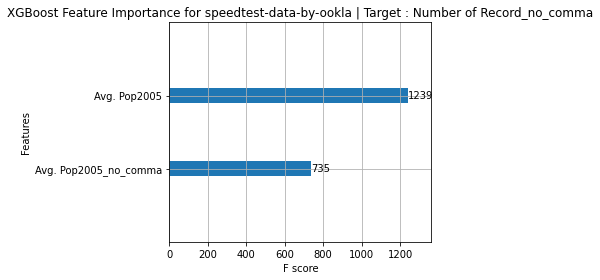

Target Variable: Avg. Pop2005_no_comma
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
18
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Laten

 12%|█▏        | 5/42 [00:00<00:00, 48.23it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.1815531823419395, 'Adjusted R-Squared': 0.1806635662357895, 'RMSE': 60.88729916589309, 'Time taken': 0.025503873825073242}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9999999592943172, 'Adjusted R-Squared': 0.9999999592500719, 'RMSE': 0.013578725225214059, 'Time taken': 0.05044126510620117}
{'Model': 'BayesianRidge', 'R-Squared': 0.00790427484629408, 'Adjusted R-Squared': 0.0068259099276487545, 'RMSE': 67.0360269736092, 'Time taken': 0.007700681686401367}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.011934757232666016}
{'Model': 'DummyRegressor', 'R-Squared': -0.00184539582544474, 'Adjusted R-Squared': -0.002934358212211441, 'RMSE': 67.36461486785066, 'Time taken': 0.007623910903930664}
{'Model': 'ElasticNet', 'R-Squared': 0.006581145450659909, 'Adjusted R-Squared': 0.0055013423478889045, 'RMSE': 67.08071408496464, 'Time taken': 0.007756471633911133}
{'Model': 'ElasticNetCV', 

 24%|██▍       | 10/42 [00:00<00:01, 26.36it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16889357566833496}
{'Model': 'GammaRegressor', 'R-Squared': 0.005554244677926534, 'Adjusted R-Squared': 0.004473325378663517, 'RMSE': 67.11537592185111, 'Time taken': 0.010440826416015625}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.19398820510106451, 'Adjusted R-Squared': 0.19311210532400047, 'RMSE': 60.42298501468912, 'Time taken': 1.204601526260376}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.005581952637412346, 'Adjusted R-Squared': 0.004501063455496501, 'RMSE': 67.1144409070146, 'Time taken': 0.011121749877929688}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6422744494739447, 'Adjusted R-Squared': 0.6418856173538077, 'RMSE': 40.253760492903, 'Time taken': 0.16905546188354492}


 33%|███▎      | 14/42 [00:02<00:05,  5.08it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9131744062683482, 'Adjusted R-Squared': 0.9130800306229877, 'RMSE': 19.831490615997648, 'Time taken': 0.3481917381286621}
{'Model': 'HuberRegressor', 'R-Squared': 0.007425359154453859, 'Adjusted R-Squared': 0.006346473675273967, 'RMSE': 67.05220521673765, 'Time taken': 0.013853311538696289}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9999997605548068, 'Adjusted R-Squared': 0.9999997602945403, 'RMSE': 0.032933246096939116, 'Time taken': 0.011330604553222656}


 50%|█████     | 21/42 [00:03<00:03,  6.02it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.5887517036572483, 'Adjusted R-Squared': -2.592652520726441, 'RMSE': 127.49794465248556, 'Time taken': 0.9983198642730713}
{'Model': 'Lars', 'R-Squared': 0.007898852597412964, 'Adjusted R-Squared': 0.006820481785018928, 'RMSE': 67.03621016436206, 'Time taken': 0.017061948776245117}
{'Model': 'LarsCV', 'R-Squared': 0.007898852597412964, 'Adjusted R-Squared': 0.006820481785018928, 'RMSE': 67.03621016436206, 'Time taken': 0.03018331527709961}
{'Model': 'Lasso', 'R-Squared': 0.007741940443478756, 'Adjusted R-Squared': 0.006663399074395615, 'RMSE': 67.04151122679501, 'Time taken': 0.01557612419128418}
{'Model': 'LassoCV', 'R-Squared': 0.007899319025098772, 'Adjusted R-Squared': 0.0068209487196913, 'RMSE': 67.03619440611597, 'Time taken': 0.08231687545776367}
{'Model': 'LassoLars', 'R-Squared': -0.00184539582544474, 'Adjusted R-Squared': -0.002934358212211441, 'RMSE': 67.36461486785066, 'Time taken': 0.009394407272338867}
{'Model': 'LassoLarsCV', 'R-Sq

 64%|██████▍   | 27/42 [00:06<00:05,  2.90it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.030264045185506405, 'Adjusted R-Squared': 0.029209984365055952, 'RMSE': 66.27629570861572, 'Time taken': 3.395871639251709}


 69%|██████▉   | 29/42 [00:07<00:04,  3.02it/s]

{'Model': 'NuSVR', 'R-Squared': 0.06996623507116762, 'Adjusted R-Squared': 0.06895532880494071, 'RMSE': 64.9054007639226, 'Time taken': 0.5255460739135742}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.007898852597412964, 'Adjusted R-Squared': 0.006820481785018928, 'RMSE': 67.03621016436206, 'Time taken': 0.008528709411621094}
OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(3690, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.004545800419474055, 'Adjusted R-Squared': -0.005637698028625682, 'RMSE': 67.45534208911437, 'Time taken': 0.010936498641967773}
{'Model': 'PoissonRegressor', 'R-Squared': 0.0068290515126057105, 'Adjusted R-Squared': 0.005749517872945531, 'RMSE': 67.07234362108917, 'Time taken': 0.010316848754882812}
{'Model': 'RANSACRegressor', 'R-Squared': -0.07607152021545494, 'Adjusted R-Squared': -0.07724116317221075, 'RMSE': 69.81553116714832, 'Time 

 81%|████████  | 34/42 [00:07<00:01,  4.17it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.999999967722788, 'Adjusted R-Squared': 0.999999967687704, 'RMSE': 0.01209148066017216, 'Time taken': 0.408297061920166}
{'Model': 'Ridge', 'R-Squared': 0.007898980985232673, 'Adjusted R-Squared': 0.006820610312390563, 'RMSE': 67.0362058267836, 'Time taken': 0.00988149642944336}
{'Model': 'RidgeCV', 'R-Squared': 0.007900066177242149, 'Adjusted R-Squared': 0.006821696683956602, 'RMSE': 67.03616916359437, 'Time taken': 0.007261037826538086}
{'Model': 'SGDRegressor', 'R-Squared': 0.008041726029374141, 'Adjusted R-Squared': 0.006963510514188753, 'RMSE': 67.03138301630112, 'Time taken': 0.011319875717163086}


 98%|█████████▊| 41/42 [00:08<00:00,  5.94it/s]

{'Model': 'SVR', 'R-Squared': 0.00048650209058320737, 'Adjusted R-Squared': -0.0005999256245357021, 'RMSE': 67.2861701689588, 'Time taken': 0.5433297157287598}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.007898852597412964, 'Adjusted R-Squared': 0.006820481785018928, 'RMSE': 67.03621016436206, 'Time taken': 0.009946823120117188}
{'Model': 'TweedieRegressor', 'R-Squared': 0.005581952637412346, 'Adjusted R-Squared': 0.004501063455496501, 'RMSE': 67.1144409070146, 'Time taken': 0.008235692977905273}
{'Model': 'XGBRegressor', 'R-Squared': 0.9997984759437384, 'Adjusted R-Squared': 0.9997982568958511, 'RMSE': 0.9554213, 'Time taken': 0.0971364974975586}


100%|██████████| 42/42 [00:08<00:00,  4.95it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9105859920711984, 'Adjusted R-Squared': 0.9104888029321454, 'RMSE': 20.124924466715022, 'Time taken': 0.09649395942687988}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Avg. Pop2005_no_comma
Avg. Pop2005_no_comma
Target Standard Deviation: 67.07556214017234
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
DecisionTreeRegressor                        1.00       1.00   0.00   
ExtraTreeRegressor                           1.00       1.00   0.00   
ExtraTreesRegressor                          1.00       1.00   0.00   
RandomForestRegressor                        1.00       1.00   0.01   
BaggingRegressor                             1.00       1.00   0.01   
KNeighborsRegressor                          1.00       1.00   0.03   
XGBRegressor                                 1.00       1.00   0.96   
HistGradientBoostingRegressor             

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,10875.826172,9183.860352,95.832458,00:02
1,5329.348633,4833.091309,69.520432,00:02
2,3674.158203,3683.940186,60.695469,00:02
3,2497.431152,3418.011475,58.463764,00:02
4,1521.762329,622.832336,24.956608,00:02
5,878.914490,724.550415,26.917473,00:02


Better model found at epoch 0 with _rmse value: 95.83245849609375.
Better model found at epoch 1 with _rmse value: 69.52043151855469.
Better model found at epoch 2 with _rmse value: 60.69546890258789.
Better model found at epoch 3 with _rmse value: 58.46376419067383.
Better model found at epoch 4 with _rmse value: 24.956607818603516.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     218     216.75
1     113     111.16
2     116     115.83
3     190     189.36
4      40      40.73
XGBoost RMSE:  0.9554213


<Figure size 432x288 with 0 Axes>

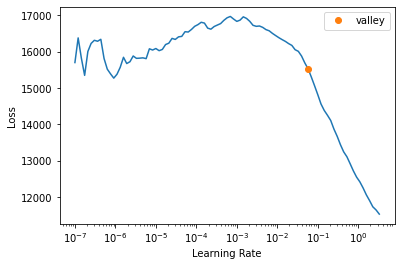

<Figure size 720x720 with 0 Axes>

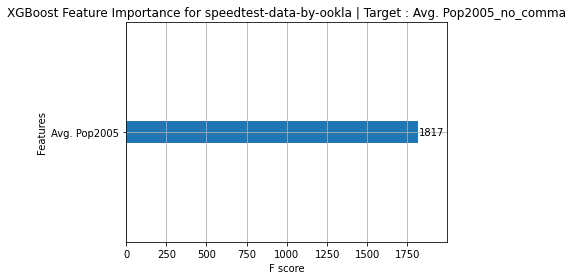

Target Variable: Avg. Avg D Kbps_no_comma
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Number of Records_n

 17%|█▋        | 7/42 [00:00<00:00, 35.30it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.03403396386937807, 'Adjusted R-Squared': 0.0319317526917271, 'RMSE': 36035.50726414111, 'Time taken': 0.05580544471740723}
{'Model': 'BaggingRegressor', 'R-Squared': 0.6746726249659446, 'Adjusted R-Squared': 0.6739646219734875, 'RMSE': 20912.6956030709, 'Time taken': 0.049486637115478516}
{'Model': 'BayesianRidge', 'R-Squared': 0.01742196795402773, 'Adjusted R-Squared': 0.015283604445766708, 'RMSE': 36344.04291901406, 'Time taken': 0.010382652282714844}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.678495524537178, 'Adjusted R-Squared': 0.6777958412391087, 'RMSE': 20789.46067930358, 'Time taken': 0.012473344802856445}
{'Model': 'DummyRegressor', 'R-Squared': -4.7564420991630385e-05, 'Adjusted R-Squared': -0.002223946498077556, 'RMSE': 36665.703, 'Time taken': 0.008326530456542969}
{'Model': 'ElasticNet', 'R-Squared': 0.013596209448564656, 'Adjusted R-Squared': 0.011449520024078397, 'RMSE': 36414.72862789654, 'Time taken': 0.009259939193

 31%|███       | 13/42 [00:02<00:07,  4.03it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.30884449184925455, 'Adjusted R-Squared': 0.3073403449327132, 'RMSE': 30481.588674254202, 'Time taken': 2.148104190826416}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.01071620647259075, 'Adjusted R-Squared': 0.0085632493593647, 'RMSE': 36467.8499200265, 'Time taken': 0.019297122955322266}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.4759385930085859, 'Adjusted R-Squared': 0.474798089402511, 'RMSE': 26542.437343493446, 'Time taken': 0.17627739906311035}


 36%|███▌      | 15/42 [00:03<00:08,  3.35it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6551383435238773, 'Adjusted R-Squared': 0.6543878284934614, 'RMSE': 21531.39491308192, 'Time taken': 0.8397443294525146}
{'Model': 'HuberRegressor', 'R-Squared': -0.05798639511475079, 'Adjusted R-Squared': -0.060288868227078796, 'RMSE': 37712.88467926693, 'Time taken': 0.03491711616516113}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6385066597182427, 'Adjusted R-Squared': 0.6377199495108831, 'RMSE': 22044.48, 'Time taken': 0.014282464981079102}


 50%|█████     | 21/42 [00:05<00:06,  3.32it/s]

{'Model': 'KernelRidge', 'R-Squared': -1.1344516965104403, 'Adjusted R-Squared': -1.1390968579827154, 'RMSE': 53566.45143946759, 'Time taken': 2.09196400642395}
{'Model': 'Lars', 'R-Squared': 0.018010452031701707, 'Adjusted R-Squared': 0.015873369228723955, 'RMSE': 36333.15773064316, 'Time taken': 0.02485966682434082}
{'Model': 'LarsCV', 'R-Squared': 0.018010452031701707, 'Adjusted R-Squared': 0.015873369228723955, 'RMSE': 36333.15773064316, 'Time taken': 0.03274059295654297}
{'Model': 'Lasso', 'R-Squared': 0.018006210325125283, 'Adjusted R-Squared': 0.015869118291012452, 'RMSE': 36333.236201146225, 'Time taken': 0.013044118881225586}
{'Model': 'LassoCV', 'R-Squared': 0.017996932172665958, 'Adjusted R-Squared': 0.01585981994670882, 'RMSE': 36333.40784403851, 'Time taken': 0.07892489433288574}
{'Model': 'LassoLars', 'R-Squared': 0.01774660812408113, 'Adjusted R-Squared': 0.015608951123263104, 'RMSE': 36338.038453915804, 'Time taken': 0.011640787124633789}
{'Model': 'LassoLarsCV', 'R-Squ

 64%|██████▍   | 27/42 [00:09<00:06,  2.40it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.0119374673318031, 'Adjusted R-Squared': -1.0163160037133738, 'RMSE': 52006.41901442514, 'Time taken': 3.168349266052246}


 67%|██████▋   | 28/42 [00:09<00:06,  2.30it/s]

{'Model': 'NuSVR', 'R-Squared': -0.03708461345789105, 'Adjusted R-Squared': -0.03934159847085694, 'RMSE': 37338.49484282114, 'Time taken': 0.5967288017272949}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.006425613227012517, 'Adjusted R-Squared': 0.004263318587680698, 'RMSE': 36546.84617192696, 'Time taken': 0.010451316833496094}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.018010452031701707, 'Adjusted R-Squared': 0.015873369228723955, 'RMSE': 36333.15773064316, 'Time taken': 0.013042688369750977}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.10937558442209805, 'Adjusted R-Squared': -0.11178989472551937, 'RMSE': 38617.93198682085, 'Time taken': 0.01778435707092285}
{'Model': 'PoissonRegressor', 'R-Squared': 0.017868751053762844, 'Adjusted R-Squared': 0.015731359869984307, 'RMSE': 36335.77907130616, 'Time taken': 0.011303901672363281}
{'Model': 'RANSACRegressor', 'R-Squared': -0.40198828616352555, 'Adjusted R-Squared': -0.4050394032172002, 'RMSE': 43413.210

 81%|████████  | 34/42 [00:10<00:02,  3.80it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6772364561179842, 'Adjusted R-Squared': 0.6765340327363041, 'RMSE': 20830.128506063822, 'Time taken': 0.33825206756591797}
{'Model': 'Ridge', 'R-Squared': 0.018007692726563662, 'Adjusted R-Squared': 0.015870603918569315, 'RMSE': 36333.20877711233, 'Time taken': 0.009234189987182617}
{'Model': 'RidgeCV', 'R-Squared': 0.01798286092504875, 'Adjusted R-Squared': 0.015845718076136994, 'RMSE': 36333.66815613114, 'Time taken': 0.012299060821533203}
{'Model': 'SGDRegressor', 'R-Squared': 0.01315118524021619, 'Adjusted R-Squared': 0.011003527319085049, 'RMSE': 36422.94210423516, 'Time taken': 0.011990547180175781}


 98%|█████████▊| 41/42 [00:11<00:00,  5.34it/s]

{'Model': 'SVR', 'R-Squared': -0.11698591588394036, 'Adjusted R-Squared': -0.11941678838858438, 'RMSE': 38750.165360710824, 'Time taken': 0.6460092067718506}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.018010452031701707, 'Adjusted R-Squared': 0.015873369228723955, 'RMSE': 36333.15773064316, 'Time taken': 0.012204647064208984}
{'Model': 'TweedieRegressor', 'R-Squared': 0.01071620647259075, 'Adjusted R-Squared': 0.0085632493593647, 'RMSE': 36467.8499200265, 'Time taken': 0.012390375137329102}
{'Model': 'XGBRegressor', 'R-Squared': 0.6773542604798547, 'Adjusted R-Squared': 0.676652093473282, 'RMSE': 20826.326, 'Time taken': 0.1104745864868164}


100%|██████████| 42/42 [00:11<00:00,  3.77it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.6551383435238773, 'Adjusted R-Squared': 0.6543878284934614, 'RMSE': 21531.39491308192, 'Time taken': 0.10737276077270508}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Avg. Avg D Kbps_no_comma
Avg. Avg D Kbps_no_comma
Target Standard Deviation: 36522.6484375
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
DecisionTreeRegressor                        0.68       0.68 20789.46   
ExtraTreeRegressor                           0.68       0.68 20789.46   
ExtraTreesRegressor                          0.68       0.68 20789.46   
XGBRegressor                                 0.68       0.68 20826.33   
RandomForestRegressor                        0.68       0.68 20830.13   
BaggingRegressor                             0.67       0.67 20912.70   
LGBMRegressor                                0.65       0.66 21531.39   
HistGradientBoostingReg

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2841064960.000000,2889969408.000000,53758.433594,00:02
1,2835966464.000000,2735180800.000000,52298.957031,00:02
2,2339952896.000000,1171251200.000000,34223.546875,00:02
3,1271705088.000000,11776304128.000000,108518.695312,00:02


Better model found at epoch 0 with _rmse value: 53758.43359375.
Better model found at epoch 1 with _rmse value: 52298.95703125.
Better model found at epoch 2 with _rmse value: 34223.546875.
No improvement since epoch 2: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Avg. Avg D Kbps_no_comma,Avg. Avg D Kbps_no_comma_pred
0,89.00,49.00,13407.00,19439.16
1,151.00,205.00,27843.00,46544.50
2,169.00,67.00,27296.00,38130.01
3,176.00,137.00,23757.00,58790.15
4,160.00,129.00,14595.00,30559.97
5,31.00,163.00,12711.00,44258.37
6,111.00,112.00,27661.00,41825.81
7,11.00,86.00,12345.00,29853.26
8,85.00,48.00,49131.00,8130.71


<Figure size 432x288 with 0 Axes>

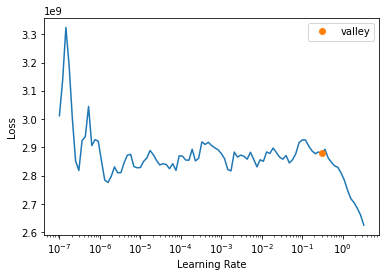

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
    actual  predicted
0 25859.00   23421.94
1 29768.00   21617.72
2 57010.00   52198.52
3 21007.00   21093.79
4 59055.00   67614.97
XGBoost RMSE:  20826.326


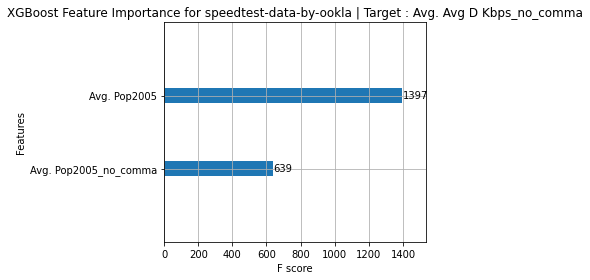

Target Variable: Avg. Avg U Kbps_no_comma
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Number of Records_n

  7%|▋         | 3/42 [00:00<00:01, 28.58it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.3090346044093877, 'Adjusted R-Squared': -0.31188342835804783, 'RMSE': 26794.757944051104, 'Time taken': 0.05559253692626953}
{'Model': 'BaggingRegressor', 'R-Squared': 0.32675389066043614, 'Adjusted R-Squared': 0.3252887195846156, 'RMSE': 19215.92082371274, 'Time taken': 0.04096508026123047}
{'Model': 'BayesianRidge', 'R-Squared': -0.003410212314768124, 'Adjusted R-Squared': -0.005593912450382321, 'RMSE': 23459.21809712588, 'Time taken': 0.008182048797607422}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.3412173360377798, 'Adjusted R-Squared': 0.3397836414480906, 'RMSE': 19008.390944146595, 'Time taken': 0.0137786865234375}


 19%|█▉        | 8/42 [00:00<00:00, 39.34it/s]

{'Model': 'DummyRegressor', 'R-Squared': 6.5971440532663905e-09, 'Adjusted R-Squared': -0.0021762719521547513, 'RMSE': 23419.318, 'Time taken': 0.010663032531738281}
{'Model': 'ElasticNet', 'R-Squared': -0.0018779388982539391, 'Adjusted R-Squared': -0.004058304380078148, 'RMSE': 23441.299368941978, 'Time taken': 0.011105537414550781}
{'Model': 'ElasticNetCV', 'R-Squared': -0.0005466559128446402, 'Adjusted R-Squared': -0.0027241241520454818, 'RMSE': 23425.71993777735, 'Time taken': 0.06004047393798828}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.3412173360377798, 'Adjusted R-Squared': 0.3397836414480906, 'RMSE': 19008.390944146595, 'Time taken': 0.009794950485229492}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.3412173360377796, 'Adjusted R-Squared': 0.33978364144809037, 'RMSE': 19008.3909441466, 'Time taken': 0.20111584663391113}
{'Model': 'GammaRegressor', 'R-Squared': -0.0010526473162897343, 'Adjusted R-Squared': -0.003231216733735387, 'RMSE': 23431.642557492312, 'Time taken': 

 29%|██▊       | 12/42 [00:01<00:06,  4.88it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.12267589368550624, 'Adjusted R-Squared': 0.12076659203955531, 'RMSE': 21935.841822349983, 'Time taken': 1.4854414463043213}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.0010219479521504926, 'Adjusted R-Squared': -0.0032004505592280186, 'RMSE': 23431.28326467976, 'Time taken': 0.013206005096435547}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.2392315410310043, 'Adjusted R-Squared': 0.23757589694184444, 'RMSE': 20426.8087996949, 'Time taken': 0.15901994705200195}


 36%|███▌      | 15/42 [00:02<00:05,  5.00it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.3322839016855027, 'Adjusted R-Squared': 0.3308307654541328, 'RMSE': 19136.838772054678, 'Time taken': 0.3894970417022705}
{'Model': 'HuberRegressor', 'R-Squared': -0.07993293770394416, 'Adjusted R-Squared': -0.08228317260645546, 'RMSE': 24337.315270794617, 'Time taken': 0.018246889114379883}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.1982998573744107, 'Adjusted R-Squared': 0.19655513453953455, 'RMSE': 20969.121, 'Time taken': 0.014166116714477539}


 50%|█████     | 21/42 [00:03<00:03,  5.58it/s]

{'Model': 'KernelRidge', 'R-Squared': -0.6180377032857756, 'Adjusted R-Squared': -0.6215590040546237, 'RMSE': 29789.86897705362, 'Time taken': 0.9948000907897949}
{'Model': 'Lars', 'R-Squared': -0.004377786902141523, 'Adjusted R-Squared': -0.0065635927495890645, 'RMSE': 23470.526071499564, 'Time taken': 0.019850730895996094}
{'Model': 'LarsCV', 'R-Squared': -0.0031415509016170517, 'Adjusted R-Squared': -0.005324666355156937, 'RMSE': 23456.077303589347, 'Time taken': 0.03838968276977539}
{'Model': 'Lasso', 'R-Squared': -0.004374509330131282, 'Adjusted R-Squared': -0.006560308044669005, 'RMSE': 23470.487775948288, 'Time taken': 0.02361893653869629}
{'Model': 'LassoCV', 'R-Squared': -0.003198602703529785, 'Adjusted R-Squared': -0.005381842317683239, 'RMSE': 23456.744304397085, 'Time taken': 0.07924818992614746}
{'Model': 'LassoLars', 'R-Squared': -0.004193741131935269, 'Adjusted R-Squared': -0.006379146444518424, 'RMSE': 23468.37556149749, 'Time taken': 0.009006023406982422}
{'Model': 'La

 64%|██████▍   | 27/42 [00:06<00:04,  3.05it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.4675342481551996, 'Adjusted R-Squared': -0.47072801148089094, 'RMSE': 28370.591929026883, 'Time taken': 2.9393651485443115}


 69%|██████▉   | 29/42 [00:07<00:04,  3.11it/s]

{'Model': 'NuSVR', 'R-Squared': -0.06264490564956637, 'Adjusted R-Squared': -0.06495751697850993, 'RMSE': 24141.72823471846, 'Time taken': 0.5824289321899414}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.00454081350332336, 'Adjusted R-Squared': -0.006726974142068354, 'RMSE': 23472.430815355718, 'Time taken': 0.009315967559814453}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.00454081350332336, 'Adjusted R-Squared': -0.006726974142068354, 'RMSE': 23472.430815355718, 'Time taken': 0.01446390151977539}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.09178670763433483, 'Adjusted R-Squared': -0.0941627396422442, 'RMSE': 24470.518731360367, 'Time taken': 0.011542558670043945}
{'Model': 'PoissonRegressor', 'R-Squared': -0.004405520222636072, 'Adjusted R-Squared': -0.006591386425514489, 'RMSE': 23470.85010849885, 'Time taken': 0.009617090225219727}
{'Model': 'RANSACRegressor', 'R-Squared': -0.12732468397761854, 'Adjusted R-Squared': -0.12977805652163932, 'RMSE': 24

 81%|████████  | 34/42 [00:07<00:01,  4.44it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.3436293715597142, 'Adjusted R-Squared': 0.3422009262312261, 'RMSE': 18973.560824180026, 'Time taken': 0.3064444065093994}
{'Model': 'Ridge', 'R-Squared': -0.004375319193955951, 'Adjusted R-Squared': -0.00656111967098294, 'RMSE': 23470.49723850184, 'Time taken': 0.009124755859375}
{'Model': 'RidgeCV', 'R-Squared': -0.00435320226052327, 'Adjusted R-Squared': -0.006538954604942138, 'RMSE': 23470.238820023773, 'Time taken': 0.01077413558959961}
{'Model': 'SGDRegressor', 'R-Squared': -0.0030312332944055775, 'Adjusted R-Squared': -0.005214108666101724, 'RMSE': 23454.787510804992, 'Time taken': 0.01693558692932129}


 98%|█████████▊| 41/42 [00:08<00:00,  6.04it/s]

{'Model': 'SVR', 'R-Squared': -0.09113710131988384, 'Adjusted R-Squared': -0.09351171960349625, 'RMSE': 24463.237744783997, 'Time taken': 0.613593339920044}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.004377786902141523, 'Adjusted R-Squared': -0.0065635927495890645, 'RMSE': 23470.526071499564, 'Time taken': 0.010658025741577148}
{'Model': 'TweedieRegressor', 'R-Squared': -0.0010219479521504926, 'Adjusted R-Squared': -0.0032004505592280186, 'RMSE': 23431.28326467976, 'Time taken': 0.008518457412719727}
{'Model': 'XGBRegressor', 'R-Squared': 0.3410937930108906, 'Adjusted R-Squared': 0.33965982955716023, 'RMSE': 19010.174, 'Time taken': 0.11089086532592773}


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.33104921624372874, 'Adjusted R-Squared': 0.329593392992899, 'RMSE': 19154.523731017565, 'Time taken': 0.11962342262268066}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Avg. Avg U Kbps_no_comma
Avg. Avg U Kbps_no_comma
Target Standard Deviation: 24188.431640625
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
RandomForestRegressor                        0.34       0.34 18973.56   
DecisionTreeRegressor                        0.34       0.34 19008.39   
ExtraTreeRegressor                           0.34       0.34 19008.39   
ExtraTreesRegressor                          0.34       0.34 19008.39   
XGBRegressor                                 0.34       0.34 19010.17   
HistGradientBoostingRegressor                0.33       0.33 19136.84   
LGBMRegressor                                0.33       0.33 19154.52   
BaggingRegressor    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,934332416.000000,885561152.000000,29758.378906,00:02
1,935891072.000000,815110400.000000,28550.138672,00:02
2,762830912.000000,514546816.000000,22683.625000,00:02
3,555897600.000000,805964800.000000,28389.517578,00:02


Better model found at epoch 0 with _rmse value: 29758.37890625.
Better model found at epoch 1 with _rmse value: 28550.138671875.
Better model found at epoch 2 with _rmse value: 22683.625.
No improvement since epoch 2: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Avg. Avg U Kbps_no_comma,Avg. Avg U Kbps_no_comma_pred
0,80.00,183.00,9887.00,36512.79
1,129.00,116.00,23705.00,10656.28
2,53.00,16.00,18022.00,14471.80
3,33.00,40.00,5902.00,31607.69
4,187.00,70.00,9808.00,12037.96
5,119.00,22.00,42728.00,19327.69
6,21.00,157.00,2607.00,19566.39
7,58.00,177.00,6383.00,31020.06
8,122.00,55.00,21379.00,34012.08


<Figure size 432x288 with 0 Axes>

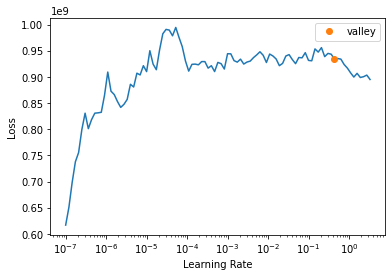

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
    actual  predicted
0  4341.00   11561.71
1 45494.00   25779.88
2  8436.00    7745.53
3  7770.00   14369.69
4 11515.00   16834.53
XGBoost RMSE:  19010.174


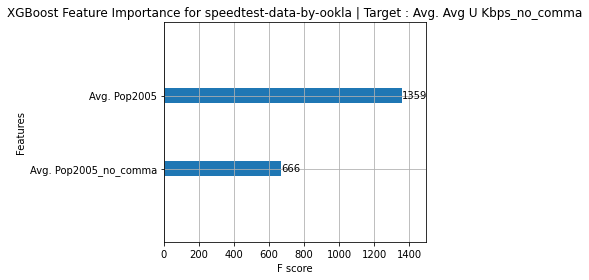

Target Variable: Tests_no_comma
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Number of Records_n

 14%|█▍        | 6/42 [00:00<00:00, 56.68it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5507587329093269, 'Adjusted R-Squared': 0.5497810587698477, 'RMSE': 995375.225713042, 'Time taken': 0.02884507179260254}
{'Model': 'BaggingRegressor', 'R-Squared': 0.7038168241635723, 'Adjusted R-Squared': 0.7031722470670838, 'RMSE': 808215.543042525, 'Time taken': 0.04321122169494629}
{'Model': 'BayesianRidge', 'R-Squared': -9.160110402195443e-06, 'Adjusted R-Squared': -0.0021854586090102046, 'RMSE': 1485077.0769486323, 'Time taken': 0.0077097415924072266}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6924346948758617, 'Adjusted R-Squared': 0.6917653470953957, 'RMSE': 823598.74683007, 'Time taken': 0.011281251907348633}
{'Model': 'DummyRegressor', 'R-Squared': -9.193752765979113e-06, 'Adjusted R-Squared': -0.0021854923245892, 'RMSE': 1485077.1, 'Time taken': 0.006983280181884766}
{'Model': 'ElasticNet', 'R-Squared': 0.09628995823377007, 'Adjusted R-Squared': 0.09432323344211346, 'RMSE': 1411762.2326152185, 'Time taken': 0.0074491500854

 29%|██▊       | 12/42 [00:01<00:05,  5.98it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.626943851022899, 'Adjusted R-Squared': 0.62613197692284, 'RMSE': 907056.0133342778, 'Time taken': 1.3450102806091309}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.08154563165362139, 'Adjusted R-Squared': 0.07954681910009287, 'RMSE': 1423232.3199300799, 'Time taken': 0.014591693878173828}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6577846976816278, 'Adjusted R-Squared': 0.6570399418550372, 'RMSE': 868753.8017617166, 'Time taken': 0.16232609748840332}


 36%|███▌      | 15/42 [00:02<00:04,  5.77it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6526587795387403, 'Adjusted R-Squared': 0.6519028682863763, 'RMSE': 875235.9914939167, 'Time taken': 0.37987780570983887}
{'Model': 'HuberRegressor', 'R-Squared': -0.031839474632903375, 'Adjusted R-Squared': -0.03408504476268104, 'RMSE': 1508526.9548545652, 'Time taken': 0.018235445022583008}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6559683997205088, 'Adjusted R-Squared': 0.6552196911236002, 'RMSE': 871056.2, 'Time taken': 0.012107133865356445}


 50%|█████     | 21/42 [00:03<00:03,  6.19it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.02681261480206454, 'Adjusted R-Squared': 0.024694687957237726, 'RMSE': 1465025.6917849793, 'Time taken': 0.9592573642730713}
{'Model': 'Lars', 'R-Squared': 0.10617665237183782, 'Adjusted R-Squared': 0.10423144378069937, 'RMSE': 1404018.5728055541, 'Time taken': 0.020174741744995117}
{'Model': 'LarsCV', 'R-Squared': 0.10617665237183782, 'Adjusted R-Squared': 0.10423144378069937, 'RMSE': 1404018.5728055541, 'Time taken': 0.01940298080444336}
{'Model': 'Lasso', 'R-Squared': 0.1061766884768981, 'Adjusted R-Squared': 0.10423147996433424, 'RMSE': 1404018.544448622, 'Time taken': 0.010460615158081055}
{'Model': 'LassoCV', 'R-Squared': 0.10619451414258518, 'Adjusted R-Squared': 0.10424934442363543, 'RMSE': 1404004.5440921464, 'Time taken': 0.08006691932678223}
{'Model': 'LassoLars', 'R-Squared': 0.10617882843928095, 'Adjusted R-Squared': 0.10423362458387142, 'RMSE': 1404016.8637200992, 'Time taken': 0.009910345077514648}
{'Model': 'LassoLarsCV', 'R-Squar

 64%|██████▍   | 27/42 [00:06<00:04,  3.06it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.06754594619647314, 'Adjusted R-Squared': -0.06986922355489855, 'RMSE': 1534406.018633664, 'Time taken': 3.109351396560669}


 79%|███████▊  | 33/42 [00:07<00:02,  4.43it/s]

{'Model': 'NuSVR', 'R-Squared': -0.048241975568170004, 'Adjusted R-Squared': -0.05052324210912351, 'RMSE': 1520469.7307799775, 'Time taken': 0.6119279861450195}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.10240407700156084, 'Adjusted R-Squared': 0.10045065823551425, 'RMSE': 1406978.4354157967, 'Time taken': 0.010383129119873047}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.10617665237183793, 'Adjusted R-Squared': 0.10423144378069948, 'RMSE': 1404018.572805554, 'Time taken': 0.014417409896850586}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.0410576395463087, 'Adjusted R-Squared': -0.04332327097078381, 'RMSE': 1515250.3506952329, 'Time taken': 0.0667879581451416}
{'Model': 'PoissonRegressor', 'R-Squared': 0.2783423321794448, 'Adjusted R-Squared': 0.2767718040666689, 'RMSE': 1261573.6826220928, 'Time taken': 0.015113115310668945}
{'Model': 'RANSACRegressor', 'R-Squared': -0.06765381698903372, 'Adjusted R-Squared': -0.06997732910435261, 'RMSE': 1534483.53914

 83%|████████▎ | 35/42 [00:07<00:01,  4.66it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6951853796873451, 'Adjusted R-Squared': 0.6945220181632696, 'RMSE': 819907.5818267281, 'Time taken': 0.3280448913574219}
{'Model': 'Ridge', 'R-Squared': 0.10617959454168024, 'Adjusted R-Squared': 0.10423439235352294, 'RMSE': 1404016.2620220457, 'Time taken': 0.010620594024658203}
{'Model': 'RidgeCV', 'R-Squared': 0.10620518255684641, 'Adjusted R-Squared': 0.10426003605533796, 'RMSE': 1403996.1650057377, 'Time taken': 0.012348413467407227}
{'Model': 'SGDRegressor', 'R-Squared': 0.10532159215243864, 'Adjusted R-Squared': 0.10337452271207404, 'RMSE': 1404689.9769790997, 'Time taken': 0.015049457550048828}


 98%|█████████▊| 41/42 [00:08<00:00,  5.95it/s]

{'Model': 'SVR', 'R-Squared': -0.06507668265943467, 'Adjusted R-Squared': -0.06739458621255645, 'RMSE': 1532630.4293419798, 'Time taken': 0.6681828498840332}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.10617665237183793, 'Adjusted R-Squared': 0.10423144378069948, 'RMSE': 1404018.572805554, 'Time taken': 0.01159214973449707}
{'Model': 'TweedieRegressor', 'R-Squared': 0.08154563165362139, 'Adjusted R-Squared': 0.07954681910009287, 'RMSE': 1423232.3199300799, 'Time taken': 0.009710311889648438}
{'Model': 'XGBRegressor', 'R-Squared': 0.6923023903792027, 'Adjusted R-Squared': 0.6916327546672967, 'RMSE': 823775.8, 'Time taken': 0.10944890975952148}


100%|██████████| 42/42 [00:08<00:00,  4.89it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.6518965166183395, 'Adjusted R-Squared': 0.651138946469522, 'RMSE': 876195.8463473642, 'Time taken': 0.1081538200378418}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Tests_no_comma
Tests_no_comma
Target Standard Deviation: 1682546.625
                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
BaggingRegressor                             0.70       0.70  808215.54   
RandomForestRegressor                        0.69       0.70  819907.58   
DecisionTreeRegressor                        0.69       0.69  823598.75   
ExtraTreeRegressor                           0.69       0.69  823598.75   
ExtraTreesRegressor                          0.69       0.69  823598.75   
XGBRegressor                                 0.69       0.69  823775.81   
GradientBoostingRegressor                    0.66       0.66  868753.80   
KNeighborsRegressor          

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2823172390912.000000,2357817507840.000000,1535518.625000,00:02
1,3147871027200.000000,2356804321280.000000,1535188.625000,00:02
2,2962199674880.000000,2326378577920.000000,1525247.000000,00:02
3,2948393598976.000000,2162024906752.000000,1470382.625000,00:02
4,2702433583104.000000,1933844021248.000000,1390627.250000,00:02
5,2651367931904.000000,1856912490496.000000,1362685.750000,00:02
6,2410560880640.000000,1572779065344.000000,1254105.000000,00:02
7,2673059037184.000000,1528091115520.000000,1236159.750000,00:02
8,2144851591168.000000,1484290654208.000000,1218314.625000,00:02
9,1986446884864.000000,1300777140224.000000,1140516.000000,00:02


Better model found at epoch 0 with _rmse value: 1535518.625.
Better model found at epoch 1 with _rmse value: 1535188.625.
Better model found at epoch 2 with _rmse value: 1525247.0.
Better model found at epoch 3 with _rmse value: 1470382.625.
Better model found at epoch 4 with _rmse value: 1390627.25.
Better model found at epoch 5 with _rmse value: 1362685.75.
Better model found at epoch 6 with _rmse value: 1254105.0.
Better model found at epoch 7 with _rmse value: 1236159.75.
Better model found at epoch 8 with _rmse value: 1218314.625.
Better model found at epoch 9 with _rmse value: 1140516.0.
Better model found at epoch 10 with _rmse value: 1060632.25.
No improvement since epoch 10: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Tests_no_comma,Tests_no_comma_pred
0,4.00,225.00,11721620.00,4443923.50
1,70.00,99.00,316798.00,200708.69
2,93.00,190.00,763769.00,337635.25
3,164.00,9.00,46.00,213184.53
4,26.00,161.00,691024.00,270095.62
5,2.00,79.00,124.00,203531.16
6,152.00,64.00,44.00,227917.36
7,77.00,180.00,1768548.00,672858.50
8,41.00,168.00,1584.00,238690.27


<Figure size 432x288 with 0 Axes>

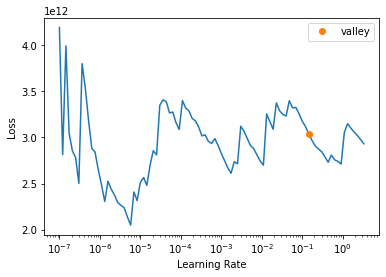

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
      actual  predicted
0   78067.00  262101.53
1     926.00    1343.50
2 3360678.00 1124155.12
3  313889.00  184788.20
4    9044.00    3352.34
XGBoost RMSE:  823775.8


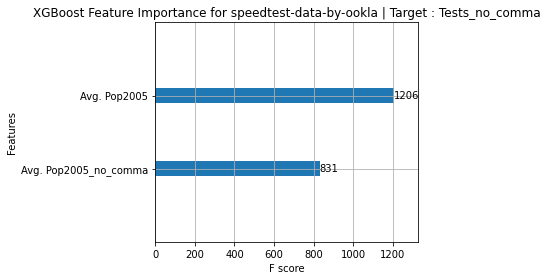

Target Variable: Devices_no_comma
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Number of Records_n

 12%|█▏        | 5/42 [00:00<00:00, 48.89it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5741760740189957, 'Adjusted R-Squared': 0.5732493625369914, 'RMSE': 327646.299195103, 'Time taken': 0.027712345123291016}
{'Model': 'BaggingRegressor', 'R-Squared': 0.6594797291773957, 'Adjusted R-Squared': 0.6587386622115141, 'RMSE': 292996.0207384773, 'Time taken': 0.04538464546203613}
{'Model': 'BayesianRidge', 'R-Squared': 0.10841107282909479, 'Adjusted R-Squared': 0.1064707269592996, 'RMSE': 474102.85453686153, 'Time taken': 0.009172201156616211}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.663035922532889, 'Adjusted R-Squared': 0.6623025948343753, 'RMSE': 291462.0662729586, 'Time taken': 0.011922836303710938}
{'Model': 'DummyRegressor', 'R-Squared': -0.0010907137605500328, 'Adjusted R-Squared': -0.0032693660211822184, 'RMSE': 502373.75, 'Time taken': 0.007735252380371094}
{'Model': 'ElasticNet', 'R-Squared': 0.08759859187793939, 'Adjusted R-Squared': 0.08561295225199372, 'RMSE': 479604.4571204045, 'Time taken': 0.0106582641601562

 24%|██▍       | 10/42 [00:00<00:01, 23.82it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.663035922532889, 'Adjusted R-Squared': 0.6623025948343753, 'RMSE': 291462.0662729586, 'Time taken': 0.19061660766601562}
{'Model': 'GammaRegressor', 'R-Squared': 0.057616165043609446, 'Adjusted R-Squared': 0.055565275304857775, 'RMSE': 487420.90421224356, 'Time taken': 0.013110637664794922}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.6252859253583434, 'Adjusted R-Squared': 0.6244704431502005, 'RMSE': 307354.9699103667, 'Time taken': 1.331636667251587}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.07109703305573212, 'Adjusted R-Squared': 0.0690754814410548, 'RMSE': 483922.0508936874, 'Time taken': 0.013900279998779297}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6525949991683963, 'Adjusted R-Squared': 0.6518389491121794, 'RMSE': 295943.13489395176, 'Time taken': 0.16366887092590332}


 33%|███▎      | 14/42 [00:02<00:06,  4.53it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6573226181722965, 'Adjusted R-Squared': 0.6565768567319752, 'RMSE': 293922.584033792, 'Time taken': 0.43389344215393066}
{'Model': 'HuberRegressor', 'R-Squared': -0.019272633072610734, 'Adjusted R-Squared': -0.021490854254488045, 'RMSE': 506915.32266019, 'Time taken': 0.017261266708374023}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6138799978163587, 'Adjusted R-Squared': 0.6130396931326076, 'RMSE': 311997.7, 'Time taken': 0.011472225189208984}


 50%|█████     | 21/42 [00:03<00:03,  5.64it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.05003986031944352, 'Adjusted R-Squared': 0.04797248243112895, 'RMSE': 489376.29471960326, 'Time taken': 0.9776058197021484}
{'Model': 'Lars', 'R-Squared': 0.10857195521509677, 'Adjusted R-Squared': 0.10663195947018955, 'RMSE': 474060.0779627714, 'Time taken': 0.01844334602355957}
{'Model': 'LarsCV', 'R-Squared': 0.10857195521509677, 'Adjusted R-Squared': 0.10663195947018955, 'RMSE': 474060.0779627714, 'Time taken': 0.03832888603210449}
{'Model': 'Lasso', 'R-Squared': 0.10857163439566597, 'Adjusted R-Squared': 0.10663163795256625, 'RMSE': 474060.1632684063, 'Time taken': 0.016764163970947266}
{'Model': 'LassoCV', 'R-Squared': 0.10852807873166836, 'Adjusted R-Squared': 0.10658798749931075, 'RMSE': 474071.7445427805, 'Time taken': 0.08878540992736816}
{'Model': 'LassoLars', 'R-Squared': 0.10855246493394255, 'Adjusted R-Squared': 0.10661242677275418, 'RMSE': 474065.2603853766, 'Time taken': 0.012215375900268555}
{'Model': 'LassoLarsCV', 'R-Squared': 

 64%|██████▍   | 27/42 [00:06<00:04,  3.09it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.05885007574751833, 'Adjusted R-Squared': -0.06115442846949337, 'RMSE': 516663.1329049252, 'Time taken': 3.00830340385437}


 69%|██████▉   | 29/42 [00:07<00:04,  3.09it/s]

{'Model': 'NuSVR', 'R-Squared': -0.04154844273956493, 'Adjusted R-Squared': -0.04381514228850847, 'RMSE': 512424.60382637475, 'Time taken': 0.6322550773620605}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.10292284644567717, 'Adjusted R-Squared': 0.10097055666645127, 'RMSE': 475559.7994514064, 'Time taken': 0.010081291198730469}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.10857195521509677, 'Adjusted R-Squared': 0.10663195947018955, 'RMSE': 474060.0779627714, 'Time taken': 0.015230178833007812}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.02822862907026824, 'Adjusted R-Squared': -0.030466340994251384, 'RMSE': 509137.49675082567, 'Time taken': 0.036718130111694336}
{'Model': 'PoissonRegressor', 'R-Squared': 0.2662312487699966, 'Adjusted R-Squared': 0.264634363566014, 'RMSE': 430100.39695972303, 'Time taken': 0.012100696563720703}
{'Model': 'RANSACRegressor', 'R-Squared': -0.061970488242831356, 'Adjusted R-Squared': -0.06428163185162972, 'RMSE': 517423.8714

 81%|████████  | 34/42 [00:07<00:01,  4.33it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6623339453806764, 'Adjusted R-Squared': 0.661599089984334, 'RMSE': 291765.50108721794, 'Time taken': 0.3144679069519043}
{'Model': 'Ridge', 'R-Squared': 0.10856169572773244, 'Adjusted R-Squared': 0.10662167765532271, 'RMSE': 474062.8059448079, 'Time taken': 0.009546756744384766}
{'Model': 'RidgeCV', 'R-Squared': 0.10846910013743549, 'Adjusted R-Squared': 0.10652888055122756, 'RMSE': 474087.42626082257, 'Time taken': 0.011978387832641602}
{'Model': 'SGDRegressor', 'R-Squared': 0.10599327250109014, 'Adjusted R-Squared': 0.10404766482426997, 'RMSE': 474745.25258206687, 'Time taken': 0.01758098602294922}


 90%|█████████ | 38/42 [00:08<00:00,  4.61it/s]

{'Model': 'SVR', 'R-Squared': -0.05969782336404106, 'Adjusted R-Squared': -0.06200402102098135, 'RMSE': 516869.91964251467, 'Time taken': 0.7026557922363281}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.10857195521509677, 'Adjusted R-Squared': 0.10663195947018955, 'RMSE': 474060.0779627714, 'Time taken': 0.011155366897583008}
{'Model': 'TweedieRegressor', 'R-Squared': 0.07109703305573212, 'Adjusted R-Squared': 0.0690754814410548, 'RMSE': 483922.0508936874, 'Time taken': 0.014175891876220703}


100%|██████████| 42/42 [00:08<00:00,  4.79it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.6630419460566163, 'Adjusted R-Squared': 0.662308631466968, 'RMSE': 291459.47, 'Time taken': 0.2602570056915283}
{'Model': 'LGBMRegressor', 'R-Squared': 0.6573226181722965, 'Adjusted R-Squared': 0.6565768567319752, 'RMSE': 293922.584033792, 'Time taken': 0.11637258529663086}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Devices_no_comma
Devices_no_comma
Target Standard Deviation: 421739.5
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
XGBRegressor                                 0.66       0.66 291459.47   
DecisionTreeRegressor                        0.66       0.66 291462.07   
ExtraTreeRegressor                           0.66       0.66 291462.07   
ExtraTreesRegressor                          0.66       0.66 291462.07   
RandomForestRegressor                        0.66       0.66 291765.50   
BaggingRegressor               

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,205122830336.000000,268127043584.000000,517809.906250,00:02
1,186734952448.000000,267682152448.000000,517380.062500,00:02
2,191054151680.000000,252947431424.000000,502938.812500,00:02
3,192082100224.000000,217595772928.000000,466471.656250,00:02
4,154669219840.000000,132007313408.000000,363328.093750,00:02
5,141409026048.000000,134644678656.000000,366939.625000,00:02


Better model found at epoch 0 with _rmse value: 517809.90625.
Better model found at epoch 1 with _rmse value: 517380.0625.
Better model found at epoch 2 with _rmse value: 502938.8125.
Better model found at epoch 3 with _rmse value: 466471.65625.
Better model found at epoch 4 with _rmse value: 363328.09375.
No improvement since epoch 4: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Devices_no_comma,Devices_no_comma_pred
0,64.00,46.00,373.00,45153.27
1,216.00,35.00,1189.00,81932.59
2,58.00,177.00,163.00,79713.53
3,168.00,66.00,189.00,95917.56
4,189.00,140.00,42573.00,97548.54
5,82.00,19.00,98.00,86544.14
6,130.00,117.00,21.00,77340.50
7,161.00,130.00,136243.00,101790.38
8,183.00,69.00,337.00,100272.73


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
     actual  predicted
0 161241.00  257032.86
1  10042.00    5959.64
2  61689.00   40609.69
3  10538.00   13966.92
4   1045.00    1747.36
XGBoost RMSE:  291459.47


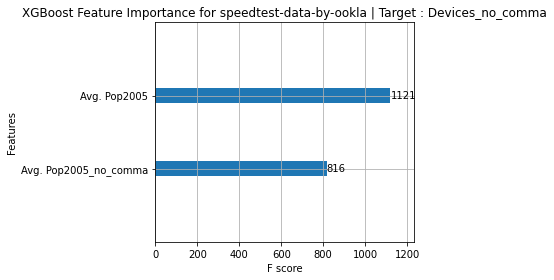

Target Variable: Number of Records_no_comma
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Devices_no_comma', 

 12%|█▏        | 5/42 [00:00<00:00, 48.42it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7648007518037174, 'Adjusted R-Squared': 0.7642888927216798, 'RMSE': 52665.740437376015, 'Time taken': 0.030444860458374023}
{'Model': 'BaggingRegressor', 'R-Squared': 0.804165221685575, 'Adjusted R-Squared': 0.803739030655511, 'RMSE': 48056.83225118667, 'Time taken': 0.04558753967285156}
{'Model': 'BayesianRidge', 'R-Squared': 0.07405864077119917, 'Adjusted R-Squared': 0.07204353443990696, 'RMSE': 104496.55460996005, 'Time taken': 0.008574724197387695}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8015976275271623, 'Adjusted R-Squared': 0.8011658486969712, 'RMSE': 48370.843452145964, 'Time taken': 0.010641813278198242}
{'Model': 'DummyRegressor', 'R-Squared': -0.00025833540414432754, 'Adjusted R-Squared': -0.0024351761776026937, 'RMSE': 108609.13, 'Time taken': 0.0076961517333984375}
{'Model': 'ElasticNet', 'R-Squared': 0.06440942694621865, 'Adjusted R-Squared': 0.06237332123772299, 'RMSE': 105039.62156308259, 'Time taken': 0.0126714706

 24%|██▍       | 10/42 [00:00<00:01, 24.27it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8015976275271626, 'Adjusted R-Squared': 0.8011658486969714, 'RMSE': 48370.84345214591, 'Time taken': 0.19064855575561523}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.7794937771023108, 'Adjusted R-Squared': 0.7790138941362659, 'RMSE': 50994.184963912136, 'Time taken': 1.3302078247070312}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.053693058388323056, 'Adjusted R-Squared': 0.051633630876654624, 'RMSE': 105639.47706894147, 'Time taken': 0.01336812973022461}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7918904524687852, 'Adjusted R-Squared': 0.7914375481216008, 'RMSE': 49540.02623958307, 'Time taken': 0.15806198120117188}


 33%|███▎      | 14/42 [00:02<00:06,  4.62it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.7503071155590666, 'Adjusted R-Squared': 0.7497637142871603, 'RMSE': 54264.188533253255, 'Time taken': 0.40459609031677246}
{'Model': 'HuberRegressor', 'R-Squared': -0.00862392111662258, 'Adjusted R-Squared': -0.01081896773493951, 'RMSE': 109062.35261774082, 'Time taken': 0.017818927764892578}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.757499629690322, 'Adjusted R-Squared': 0.7569718813327384, 'RMSE': 53476.92, 'Time taken': 0.012948274612426758}


 50%|█████     | 21/42 [00:03<00:03,  5.88it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.02912161485269693, 'Adjusted R-Squared': 0.027008713035183818, 'RMSE': 107002.18496640213, 'Time taken': 0.9182498455047607}
{'Model': 'Lars', 'R-Squared': 0.07408052921136532, 'Adjusted R-Squared': 0.07206547051541623, 'RMSE': 104495.31949929253, 'Time taken': 0.019988059997558594}
{'Model': 'LarsCV', 'R-Squared': 0.07408052921136532, 'Adjusted R-Squared': 0.07206547051541623, 'RMSE': 104495.31949929253, 'Time taken': 0.037878990173339844}
{'Model': 'Lasso', 'R-Squared': 0.07408088160973025, 'Adjusted R-Squared': 0.07206582368069814, 'RMSE': 104495.29961420296, 'Time taken': 0.017487764358520508}
{'Model': 'LassoCV', 'R-Squared': 0.07408989937722943, 'Adjusted R-Squared': 0.07207486107337147, 'RMSE': 104494.79075949182, 'Time taken': 0.06867027282714844}
{'Model': 'LassoLars', 'R-Squared': 0.07410107108223685, 'Adjusted R-Squared': 0.07208605709112093, 'RMSE': 104494.16035892823, 'Time taken': 0.01003575325012207}
{'Model': 'LassoLarsCV', 'R-Squ

 64%|██████▍   | 27/42 [00:06<00:04,  3.14it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.026985711453834993, 'Adjusted R-Squared': -0.02922071844285301, 'RMSE': 110050.60398676925, 'Time taken': 2.9827349185943604}


 69%|██████▉   | 29/42 [00:07<00:04,  3.16it/s]

{'Model': 'NuSVR', 'R-Squared': -0.026432962746100408, 'Adjusted R-Squared': -0.028666766799954724, 'RMSE': 110020.98404378709, 'Time taken': 0.6045248508453369}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.07482097910373531, 'Adjusted R-Squared': 0.07280753183301447, 'RMSE': 104453.52913552575, 'Time taken': 0.008258819580078125}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.07408052921136532, 'Adjusted R-Squared': 0.07206547051541623, 'RMSE': 104495.31949929253, 'Time taken': 0.015104055404663086}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.016094953968987413, 'Adjusted R-Squared': -0.01830625963594934, 'RMSE': 109465.52822753106, 'Time taken': 0.014125347137451172}
{'Model': 'PoissonRegressor', 'R-Squared': 0.20007314075662352, 'Adjusted R-Squared': 0.1983322770803594, 'RMSE': 97125.97007653132, 'Time taken': 0.01153564453125}
{'Model': 'RANSACRegressor', 'R-Squared': -0.04228982724100194, 'Adjusted R-Squared': -0.044558140249143285, 'RMSE': 110867.557

 81%|████████  | 34/42 [00:07<00:01,  4.43it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8006051811343771, 'Adjusted R-Squared': 0.8001712424643757, 'RMSE': 48491.672616288764, 'Time taken': 0.3229203224182129}
{'Model': 'Ridge', 'R-Squared': 0.0740793800525652, 'Adjusted R-Squared': 0.0720643188557264, 'RMSE': 104495.3843438511, 'Time taken': 0.00954580307006836}
{'Model': 'RidgeCV', 'R-Squared': 0.07406855748713193, 'Adjusted R-Squared': 0.07205347273737606, 'RMSE': 104495.9950359588, 'Time taken': 0.008567571640014648}
{'Model': 'SGDRegressor', 'R-Squared': 0.0741287088521938, 'Adjusted R-Squared': 0.0721137550085642, 'RMSE': 104492.60078961277, 'Time taken': 0.012113094329833984}


 98%|█████████▊| 41/42 [00:08<00:00,  5.90it/s]

{'Model': 'SVR', 'R-Squared': -0.039619023424620536, 'Adjusted R-Squared': -0.0418815240196686, 'RMSE': 110725.4206087042, 'Time taken': 0.6644055843353271}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.07408052921136532, 'Adjusted R-Squared': 0.07206547051541623, 'RMSE': 104495.31949929253, 'Time taken': 0.00923776626586914}
{'Model': 'TweedieRegressor', 'R-Squared': 0.053693058388323056, 'Adjusted R-Squared': 0.051633630876654624, 'RMSE': 105639.47706894147, 'Time taken': 0.009554147720336914}
{'Model': 'XGBRegressor', 'R-Squared': 0.801591070065559, 'Adjusted R-Squared': 0.8011592769645047, 'RMSE': 48371.645, 'Time taken': 0.11419367790222168}


100%|██████████| 42/42 [00:08<00:00,  5.01it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7503233218027826, 'Adjusted R-Squared': 0.7497799558001772, 'RMSE': 54262.427504026375, 'Time taken': 0.11137938499450684}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Number of Records_no_comma
Number of Records_no_comma
Target Standard Deviation: 88796.75
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
BaggingRegressor                             0.80       0.80  48056.83   
ExtraTreesRegressor                          0.80       0.80  48370.84   
DecisionTreeRegressor                        0.80       0.80  48370.84   
ExtraTreeRegressor                           0.80       0.80  48370.84   
XGBRegressor                                 0.80       0.80  48371.64   
RandomForestRegressor                        0.80       0.80  48491.67   
GradientBoostingRegressor                    0.79       0.79  49540.03   
GaussianProces

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,9735128064.000000,12306796544.000000,110936.000000,00:02
1,8852632576.000000,12265127936.000000,110748.023438,00:02
2,8519979008.000000,10385922048.000000,101911.343750,00:02
3,7226583040.000000,44552908800.000000,211075.562500,00:02


Better model found at epoch 0 with _rmse value: 110936.0.
Better model found at epoch 1 with _rmse value: 110748.0234375.
Better model found at epoch 2 with _rmse value: 101911.34375.
No improvement since epoch 2: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Number of Records_no_comma,Number of Records_no_comma_pred
0,130.00,117.00,23.00,12633.12
1,208.00,33.00,97.00,6958.99
2,194.00,212.00,44814.00,10537.85
3,123.00,198.00,90316.00,20252.04
4,134.00,121.00,16288.00,18370.51
5,145.00,62.00,15460.00,24996.18
6,140.00,201.00,68685.00,16028.47
7,135.00,122.00,7.00,12420.90
8,221.00,152.00,431.00,9473.92


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
    actual  predicted
0 14220.00   23684.50
1     0.00   21606.80
2   255.00     548.56
3  6965.00    6161.69
4   247.00     123.91
XGBoost RMSE:  48371.645


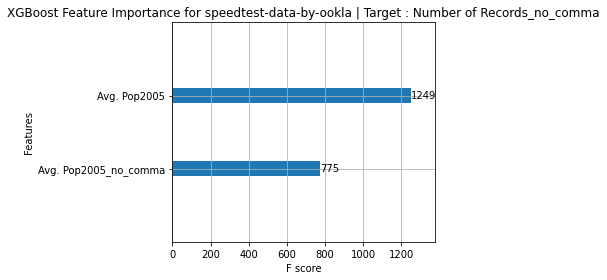

Target Variable: Rank Latency
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Download', 'Number of Records_no_comma', 'Devic

 10%|▉         | 4/42 [00:00<00:01, 36.74it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.12061107007724858, 'Adjusted R-Squared': 0.11869727479994119, 'RMSE': 63.1175424986749, 'Time taken': 0.037641048431396484}
{'Model': 'BaggingRegressor', 'R-Squared': 0.6171890643111803, 'Adjusted R-Squared': 0.6163559610779075, 'RMSE': 41.64393422518679, 'Time taken': 0.048078298568725586}
{'Model': 'BayesianRidge', 'R-Squared': 0.02214548774450731, 'Adjusted R-Squared': 0.02001740393111129, 'RMSE': 66.55745482688303, 'Time taken': 0.009974002838134766}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6162738785975754, 'Adjusted R-Squared': 0.6154387836652524, 'RMSE': 41.69368356455731, 'Time taken': 0.012853860855102539}
{'Model': 'DummyRegressor', 'R-Squared': -0.00033242126112909, 'Adjusted R-Squared': -0.0025094232660498594, 'RMSE': 67.318085, 'Time taken': 0.009856939315795898}
{'Model': 'ElasticNet', 'R-Squared': 0.01687989218858721, 'Adjusted R-Squared': 0.014740348972457906, 'RMSE': 66.73641504054339, 'Time taken': 0.0112280845642

 21%|██▏       | 9/42 [00:00<00:01, 20.37it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6162738785975754, 'Adjusted R-Squared': 0.6154387836652524, 'RMSE': 41.69368356455731, 'Time taken': 0.21190261840820312}
{'Model': 'GammaRegressor', 'R-Squared': 0.014540717779017664, 'Adjusted R-Squared': 0.012396083867764252, 'RMSE': 66.81576209328344, 'Time taken': 0.012968778610229492}


 29%|██▊       | 12/42 [00:01<00:05,  5.19it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.2862628037540771, 'Adjusted R-Squared': 0.2847095127938031, 'RMSE': 56.86286653172373, 'Time taken': 1.3359553813934326}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.014422481485331429, 'Adjusted R-Squared': 0.012277590258966575, 'RMSE': 66.81977028076656, 'Time taken': 0.011952400207519531}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3809479320085406, 'Adjusted R-Squared': 0.37960070226318376, 'RMSE': 52.956975479982745, 'Time taken': 0.16077685356140137}


 33%|███▎      | 14/42 [00:02<00:05,  4.69it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.581493390008226, 'Adjusted R-Squared': 0.5805826030441525, 'RMSE': 43.54223775637039, 'Time taken': 0.385145902633667}
{'Model': 'HuberRegressor', 'R-Squared': 0.02254524096418431, 'Adjusted R-Squared': 0.02041802712515106, 'RMSE': 66.54384887818824, 'Time taken': 0.017490625381469727}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5671911080898304, 'Adjusted R-Squared': 0.5662491953762065, 'RMSE': 44.280006, 'Time taken': 0.012443304061889648}


 50%|█████     | 21/42 [00:03<00:03,  5.88it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.7843269541925983, 'Adjusted R-Squared': -2.792562703820874, 'RMSE': 130.93444435397944, 'Time taken': 0.9693682193756104}
{'Model': 'Lars', 'R-Squared': 0.02240366967751073, 'Adjusted R-Squared': 0.020276147739921035, 'RMSE': 66.54866769825529, 'Time taken': 0.019995689392089844}
{'Model': 'LarsCV', 'R-Squared': 0.02240366967751073, 'Adjusted R-Squared': 0.020276147739921035, 'RMSE': 66.54866769825529, 'Time taken': 0.03783082962036133}
{'Model': 'Lasso', 'R-Squared': 0.02070513120123907, 'Adjusted R-Squared': 0.018573912770773915, 'RMSE': 66.60645556680878, 'Time taken': 0.02363276481628418}
{'Model': 'LassoCV', 'R-Squared': 0.02239246899454772, 'Adjusted R-Squared': 0.020264922681151765, 'RMSE': 66.54904893352098, 'Time taken': 0.08466863632202148}
{'Model': 'LassoLars', 'R-Squared': -0.00033241981113119046, 'Adjusted R-Squared': -0.002509421812896484, 'RMSE': 67.31808546059465, 'Time taken': 0.010880708694458008}
{'Model': 'LassoLarsCV', 'R-S

 64%|██████▍   | 27/42 [00:06<00:04,  3.01it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.03278266179443656, 'Adjusted R-Squared': 0.030677727434903268, 'RMSE': 66.19445647698033, 'Time taken': 3.0587127208709717}


 67%|██████▋   | 28/42 [00:07<00:05,  2.79it/s]

{'Model': 'NuSVR', 'R-Squared': 0.07866503539961567, 'Adjusted R-Squared': 0.07665995386620905, 'RMSE': 64.60533168072487, 'Time taken': 0.5924041271209717}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.017096091543115755, 'Adjusted R-Squared': 0.014957018837007285, 'RMSE': 66.72907658664097, 'Time taken': 0.011633157730102539}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.02240366967751084, 'Adjusted R-Squared': 0.020276147739921146, 'RMSE': 66.54866769825529, 'Time taken': 0.01281428337097168}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.017374590899597475, 'Adjusted R-Squared': -0.019588681412980646, 'RMSE': 67.8890962685403, 'Time taken': 0.008655309677124023}
{'Model': 'PoissonRegressor', 'R-Squared': 0.02202162785008943, 'Adjusted R-Squared': 0.01989327448306033, 'RMSE': 66.5616699418059, 'Time taken': 0.009308338165283203}
{'Model': 'RANSACRegressor', 'R-Squared': -0.6483213914767734, 'Adjusted R-Squared': -0.65190859798706, 'RMSE': 86.41328823789799

 81%|████████  | 34/42 [00:07<00:01,  4.46it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6154821829374759, 'Adjusted R-Squared': 0.6146453650548589, 'RMSE': 41.73667216803555, 'Time taken': 0.3312194347381592}
{'Model': 'Ridge', 'R-Squared': 0.022401558516878084, 'Adjusted R-Squared': 0.02027403198481481, 'RMSE': 66.54873955554812, 'Time taken': 0.013503313064575195}
{'Model': 'RidgeCV', 'R-Squared': 0.022382490901352803, 'Adjusted R-Squared': 0.02025492287284658, 'RMSE': 66.54938855391917, 'Time taken': 0.012654542922973633}
{'Model': 'SGDRegressor', 'R-Squared': 0.022010074194319662, 'Adjusted R-Squared': 0.019881695683317102, 'RMSE': 66.56206311427913, 'Time taken': 0.01518106460571289}


 98%|█████████▊| 41/42 [00:08<00:00,  5.93it/s]

{'Model': 'SVR', 'R-Squared': 0.08125079061628837, 'Adjusted R-Squared': 0.07925133640653059, 'RMSE': 64.51460954661015, 'Time taken': 0.6557009220123291}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.02240366967751073, 'Adjusted R-Squared': 0.020276147739921035, 'RMSE': 66.54866769825529, 'Time taken': 0.010631561279296875}
{'Model': 'TweedieRegressor', 'R-Squared': 0.014422481485331429, 'Adjusted R-Squared': 0.012277590258966575, 'RMSE': 66.81977028076656, 'Time taken': 0.00926351547241211}
{'Model': 'XGBRegressor', 'R-Squared': 0.6149364435520603, 'Adjusted R-Squared': 0.6140984379885175, 'RMSE': 41.76628, 'Time taken': 0.11102724075317383}


100%|██████████| 42/42 [00:08<00:00,  4.90it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.5771890621658136, 'Adjusted R-Squared': 0.5762689077853257, 'RMSE': 43.76558025773374, 'Time taken': 0.11984682083129883}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Rank Latency
Rank Latency
Target Standard Deviation: 65.45056915283203
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
BaggingRegressor                             0.62       0.62  41.64   
DecisionTreeRegressor                        0.62       0.62  41.69   
ExtraTreeRegressor                           0.62       0.62  41.69   
ExtraTreesRegressor                          0.62       0.62  41.69   
RandomForestRegressor                        0.61       0.62  41.74   
XGBRegressor                                 0.61       0.61  41.77   
HistGradientBoostingRegressor                0.58       0.58  43.54   
LGBMRegressor                                0.58       0.58 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,12748.386719,10807.835938,103.960739,00:02
1,6481.665527,5756.508301,75.871658,00:02
2,4638.785156,4356.511230,66.003876,00:02
3,3781.082031,3540.637695,59.503254,00:02
4,3408.613037,3324.209961,57.655964,00:02
5,2822.833252,5814.506348,76.252907,00:02


Better model found at epoch 0 with _rmse value: 103.96073913574219.
Better model found at epoch 1 with _rmse value: 75.87165832519531.
Better model found at epoch 2 with _rmse value: 66.00387573242188.
Better model found at epoch 3 with _rmse value: 59.50325393676758.
Better model found at epoch 4 with _rmse value: 57.65596389770508.
No improvement since epoch 4: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Rank Latency,Rank Latency_pred
0,24.00,159.00,143.00,160.94
1,115.00,194.00,90.00,80.90
2,219.00,150.00,89.00,117.72
3,179.00,207.00,100.00,126.52
4,80.00,183.00,104.00,263.94
5,31.00,163.00,14.00,84.11
6,5.00,81.00,101.00,102.16
7,195.00,71.00,215.00,198.33
8,145.00,62.00,133.00,163.37


<Figure size 432x288 with 0 Axes>

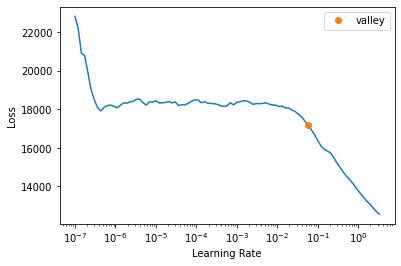

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   33.00      33.82
1   86.00     134.77
2  195.00     192.61
3  220.00     204.94
4   44.00     109.76
XGBoost RMSE:  41.76628


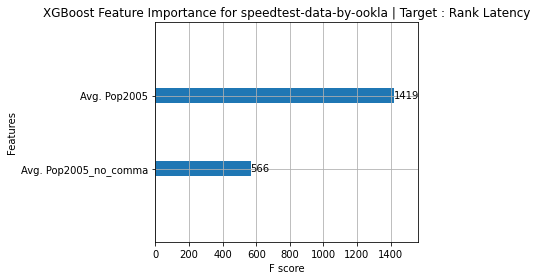

Target Variable: Rank Download
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Upload', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Upload', 'Rank Latency', 'Number of Records_no_comma', 'Device

 10%|▉         | 4/42 [00:00<00:01, 36.59it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.10233442385862335, 'Adjusted R-Squared': 0.10038085350793491, 'RMSE': 62.48930224095197, 'Time taken': 0.04436182975769043}
{'Model': 'BaggingRegressor', 'R-Squared': 0.7555113289539357, 'Adjusted R-Squared': 0.7549792535000814, 'RMSE': 32.61202448585617, 'Time taken': 0.0468595027923584}
{'Model': 'BayesianRidge', 'R-Squared': 0.029717362324528485, 'Adjusted R-Squared': 0.027605757019467658, 'RMSE': 64.96770416036617, 'Time taken': 0.007879972457885742}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7587830630815872, 'Adjusted R-Squared': 0.7582581078325809, 'RMSE': 32.39308338346913, 'Time taken': 0.009961366653442383}
{'Model': 'DummyRegressor', 'R-Squared': -0.00016105218754969286, 'Adjusted R-Squared': -0.002337681245629275, 'RMSE': 65.96041, 'Time taken': 0.011649131774902344}
{'Model': 'ElasticNet', 'R-Squared': 0.024326891852938015, 'Adjusted R-Squared': 0.022203555382541817, 'RMSE': 65.14792043179654, 'Time taken': 0.00911307334

 21%|██▏       | 9/42 [00:00<00:01, 21.76it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.7587830630815872, 'Adjusted R-Squared': 0.7582581078325809, 'RMSE': 32.39308338346913, 'Time taken': 0.19248366355895996}
{'Model': 'GammaRegressor', 'R-Squared': 0.021003072960520952, 'Adjusted R-Squared': 0.018872502934319746, 'RMSE': 65.25879556976719, 'Time taken': 0.012938499450683594}


 29%|██▊       | 12/42 [00:01<00:05,  5.28it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3570787264494292, 'Adjusted R-Squared': 0.3556795506636826, 'RMSE': 52.8843642631934, 'Time taken': 1.3262920379638672}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.021100922272081712, 'Adjusted R-Squared': 0.018970565193239697, 'RMSE': 65.25553422766924, 'Time taken': 0.011638879776000977}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.46939144948902, 'Adjusted R-Squared': 0.4682366974748503, 'RMSE': 48.043596614228434, 'Time taken': 0.16186761856079102}


 33%|███▎      | 14/42 [00:02<00:06,  4.62it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.727731505135524, 'Adjusted R-Squared': 0.7271389730465916, 'RMSE': 34.41494541420238, 'Time taken': 0.4284236431121826}
{'Model': 'HuberRegressor', 'R-Squared': 0.022927541030669074, 'Adjusted R-Squared': 0.020801159183075346, 'RMSE': 65.19462261647405, 'Time taken': 0.020200014114379883}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7291448507501763, 'Adjusted R-Squared': 0.7285553944950081, 'RMSE': 34.325504, 'Time taken': 0.01283884048461914}


 50%|█████     | 21/42 [00:03<00:03,  6.17it/s]

{'Model': 'KernelRidge', 'R-Squared': -3.020880525291153, 'Adjusted R-Squared': -3.029631081385366, 'RMSE': 132.25404816103656, 'Time taken': 0.8666043281555176}
{'Model': 'Lars', 'R-Squared': 0.02976977843857942, 'Adjusted R-Squared': 0.027658287205583942, 'RMSE': 64.96594931056751, 'Time taken': 0.020688772201538086}
{'Model': 'LarsCV', 'R-Squared': 0.02976977843857942, 'Adjusted R-Squared': 0.027658287205583942, 'RMSE': 64.96594931056751, 'Time taken': 0.03813576698303223}
{'Model': 'Lasso', 'R-Squared': 0.028217685199565135, 'Adjusted R-Squared': 0.02610281617932486, 'RMSE': 65.01789209411406, 'Time taken': 0.008934736251831055}
{'Model': 'LassoCV', 'R-Squared': 0.02975982325658122, 'Adjusted R-Squared': 0.027648310358336592, 'RMSE': 64.9662826057874, 'Time taken': 0.07512068748474121}
{'Model': 'LassoLars', 'R-Squared': -0.0001610545119936635, 'Adjusted R-Squared': -0.002337683575131866, 'RMSE': 65.9604119788628, 'Time taken': 0.010576963424682617}
{'Model': 'LassoLarsCV', 'R-Squa

 64%|██████▍   | 27/42 [00:06<00:05,  2.96it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.03942487444413667, 'Adjusted R-Squared': 0.037334395389608144, 'RMSE': 64.64189179391094, 'Time taken': 3.1849935054779053}


 69%|██████▉   | 29/42 [00:07<00:04,  3.02it/s]

{'Model': 'NuSVR', 'R-Squared': 0.06474792191332723, 'Adjusted R-Squared': 0.06271255286417243, 'RMSE': 63.78414387709838, 'Time taken': 0.5924174785614014}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.014044447012656613, 'Adjusted R-Squared': 0.011898733077972512, 'RMSE': 65.49031185157456, 'Time taken': 0.009486198425292969}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.02976977843857953, 'Adjusted R-Squared': 0.027658287205584053, 'RMSE': 64.96594931056751, 'Time taken': 0.015439748764038086}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.021856382458414148, 'Adjusted R-Squared': -0.024080226598693466, 'RMSE': 66.67197506983685, 'Time taken': 0.009974479675292969}
{'Model': 'PoissonRegressor', 'R-Squared': 0.028487016080156025, 'Adjusted R-Squared': 0.026372733198937737, 'RMSE': 65.00888156811678, 'Time taken': 0.01058340072631836}
{'Model': 'RANSACRegressor', 'R-Squared': -0.1662095939459105, 'Adjusted R-Squared': -0.16874759088594504, 'RMSE': 71.2256948

 81%|████████  | 34/42 [00:07<00:01,  4.33it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7591617868154116, 'Adjusted R-Squared': 0.7586376557747487, 'RMSE': 32.36764394128391, 'Time taken': 0.3188347816467285}
{'Model': 'Ridge', 'R-Squared': 0.029769142234158164, 'Adjusted R-Squared': 0.027657649616604663, 'RMSE': 64.96597061046958, 'Time taken': 0.01120615005493164}
{'Model': 'RidgeCV', 'R-Squared': 0.029763215904751394, 'Adjusted R-Squared': 0.027651710389854256, 'RMSE': 64.96616902157508, 'Time taken': 0.00970768928527832}
{'Model': 'SGDRegressor', 'R-Squared': 0.02944128052837347, 'Adjusted R-Squared': 0.02732907439241783, 'RMSE': 64.97694637703948, 'Time taken': 0.016486406326293945}


 98%|█████████▊| 41/42 [00:08<00:00,  5.83it/s]

{'Model': 'SVR', 'R-Squared': 0.058296172098665444, 'Adjusted R-Squared': 0.05624676224469083, 'RMSE': 64.00377026365, 'Time taken': 0.6538026332855225}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.02976977843857953, 'Adjusted R-Squared': 0.027658287205584053, 'RMSE': 64.96594931056751, 'Time taken': 0.014741897583007812}
{'Model': 'TweedieRegressor', 'R-Squared': 0.021100922272081712, 'Adjusted R-Squared': 0.018970565193239697, 'RMSE': 65.25553422766924, 'Time taken': 0.009744405746459961}
{'Model': 'XGBRegressor', 'R-Squared': 0.7589814886333517, 'Adjusted R-Squared': 0.7584569652136202, 'RMSE': 32.379757, 'Time taken': 0.11165118217468262}


100%|██████████| 42/42 [00:08<00:00,  4.90it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7207116020333373, 'Adjusted R-Squared': 0.7201037926797647, 'RMSE': 34.85578252314579, 'Time taken': 0.12347960472106934}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Rank Download
Rank Download
Target Standard Deviation: 66.86405944824219
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RandomForestRegressor                        0.76       0.76  32.37   
XGBRegressor                                 0.76       0.76  32.38   
DecisionTreeRegressor                        0.76       0.76  32.39   
ExtraTreeRegressor                           0.76       0.76  32.39   
ExtraTreesRegressor                          0.76       0.76  32.39   
BaggingRegressor                             0.75       0.76  32.61   
KNeighborsRegressor                          0.73       0.73  34.33   
HistGradientBoostingRegressor                0.73       0.7

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,12279.256836,10299.238281,101.485161,00:02
1,6307.041992,5324.985840,72.972496,00:02
2,4394.278809,3270.766846,57.190620,00:02
3,3650.229248,6873.902832,82.909012,00:02


Better model found at epoch 0 with _rmse value: 101.48516082763672.
Better model found at epoch 1 with _rmse value: 72.97249603271484.
Better model found at epoch 2 with _rmse value: 57.19062042236328.
No improvement since epoch 2: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Rank Download,Rank Download_pred
0,33.00,40.00,215.00,158.61
1,21.00,157.00,133.00,103.03
2,1.00,1.00,122.00,97.69
3,190.00,141.00,14.00,91.87
4,44.00,14.00,89.00,78.86
5,167.00,134.00,164.00,181.41
6,132.00,119.00,21.00,83.19
7,98.00,51.00,14.00,70.65
8,188.00,210.00,186.00,87.38


<Figure size 432x288 with 0 Axes>

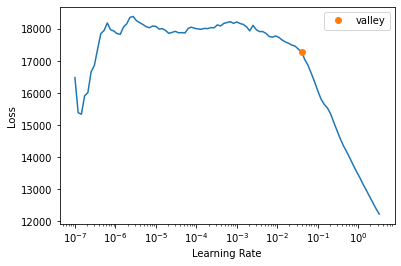

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   84.00     116.93
1  133.00     102.54
2   20.00      24.04
3   71.00      85.57
4  218.00     214.84
XGBoost RMSE:  32.379757


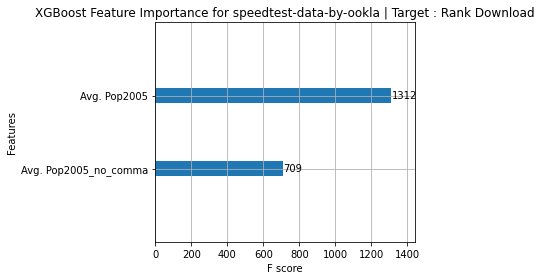

Target Variable: Rank Upload
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Avg Lat Ms', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Avg Lat Ms', 'Rank Download', 'Rank Latency', 'Number of Records_no_comma', 'Devi

 12%|█▏        | 5/42 [00:00<00:00, 46.42it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.059204817038316926, 'Adjusted R-Squared': 0.057157384648846454, 'RMSE': 65.42763864348261, 'Time taken': 0.026618480682373047}
{'Model': 'BaggingRegressor', 'R-Squared': 0.5262182514416676, 'Adjusted R-Squared': 0.5251871703784285, 'RMSE': 46.43044724765583, 'Time taken': 0.051447153091430664}
{'Model': 'BayesianRidge', 'R-Squared': 0.001458696825392236, 'Adjusted R-Squared': -0.0007144072076319397, 'RMSE': 67.40571513006122, 'Time taken': 0.00933384895324707}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.5293458390715807, 'Adjusted R-Squared': 0.5283215645102566, 'RMSE': 46.27694224185968, 'Time taken': 0.012034177780151367}
{'Model': 'DummyRegressor', 'R-Squared': -0.00128961388366311, 'Adjusted R-Squared': -0.003468699006369702, 'RMSE': 67.49841, 'Time taken': 0.007947921752929688}
{'Model': 'ElasticNet', 'R-Squared': 0.0019152217960787254, 'Adjusted R-Squared': -0.0002568887114378082, 'RMSE': 67.39030469583473, 'Time taken': 0.01176

 24%|██▍       | 10/42 [00:00<00:01, 21.40it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.5293458390715808, 'Adjusted R-Squared': 0.5283215645102568, 'RMSE': 46.27694224185968, 'Time taken': 0.2118542194366455}
{'Model': 'GammaRegressor', 'R-Squared': 0.0016076814518429794, 'Adjusted R-Squared': -0.0005650983491323203, 'RMSE': 67.40068639971572, 'Time taken': 0.015999555587768555}


 31%|███       | 13/42 [00:01<00:05,  4.85it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.22286063154948943, 'Adjusted R-Squared': 0.2211693598009573, 'RMSE': 59.46523765690222, 'Time taken': 1.3829529285430908}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0016728835628433414, 'Adjusted R-Squared': -0.0004997543401754623, 'RMSE': 67.39848549196253, 'Time taken': 0.012319803237915039}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3189322614563469, 'Adjusted R-Squared': 0.31745006833655665, 'RMSE': 55.66841526166685, 'Time taken': 0.16953134536743164}


 36%|███▌      | 15/42 [00:02<00:05,  4.78it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5019360862494536, 'Adjusted R-Squared': 0.5008521604306276, 'RMSE': 47.60540259795152, 'Time taken': 0.41980409622192383}
{'Model': 'HuberRegressor', 'R-Squared': 0.00014866455952788904, 'Adjusted R-Squared': -0.0020272904686340354, 'RMSE': 67.44991696628848, 'Time taken': 0.015743494033813477}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.47063269944513286, 'Adjusted R-Squared': 0.46948064873663486, 'RMSE': 49.078613, 'Time taken': 0.012516260147094727}


 50%|█████     | 21/42 [00:03<00:03,  5.36it/s]

{'Model': 'KernelRidge', 'R-Squared': -3.0430446639519824, 'Adjusted R-Squared': -3.051843455386045, 'RMSE': 135.63381374637555, 'Time taken': 1.0200037956237793}
{'Model': 'Lars', 'R-Squared': 0.00111366506564603, 'Adjusted R-Squared': -0.0010601898526005904, 'RMSE': 67.41735966781853, 'Time taken': 0.01848125457763672}
{'Model': 'LarsCV', 'R-Squared': 0.00111366506564603, 'Adjusted R-Squared': -0.0010601898526005904, 'RMSE': 67.41735966781853, 'Time taken': 0.047106027603149414}
{'Model': 'Lasso', 'R-Squared': 0.0019909139567092504, 'Adjusted R-Squared': -0.00018103182358086833, 'RMSE': 67.3877492944334, 'Time taken': 0.026771068572998047}
{'Model': 'LassoCV', 'R-Squared': 0.0011231679752472523, 'Adjusted R-Squared': -0.0010506662620208829, 'RMSE': 67.41703897937992, 'Time taken': 0.09746813774108887}
{'Model': 'LassoLars', 'R-Squared': -0.0012896157956430176, 'Adjusted R-Squared': -0.0034687009225105037, 'RMSE': 67.49841268980397, 'Time taken': 0.015589237213134766}
{'Model': 'Lasso

 64%|██████▍   | 27/42 [00:06<00:05,  2.85it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.002446606590997824, 'Adjusted R-Squared': 0.00027565252481942526, 'RMSE': 67.37236285779296, 'Time taken': 3.131969928741455}


 67%|██████▋   | 28/42 [00:07<00:05,  2.66it/s]

{'Model': 'NuSVR', 'R-Squared': 0.026782136514985178, 'Adjusted R-Squared': 0.0246641433409156, 'RMSE': 66.54550723876899, 'Time taken': 0.5938990116119385}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0015710483089429461, 'Adjusted R-Squared': -0.0006018112159560385, 'RMSE': 67.40192292581966, 'Time taken': 0.010605573654174805}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.0015710483089429461, 'Adjusted R-Squared': -0.0006018112159560385, 'RMSE': 67.40192292581966, 'Time taken': 0.012349605560302734}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.03329093754439438, 'Adjusted R-Squared': -0.03553966646179241, 'RMSE': 68.56855764663429, 'Time taken': 0.010097265243530273}
{'Model': 'PoissonRegressor', 'R-Squared': 0.0012458953858891508, 'Adjusted R-Squared': -0.0009276717623460939, 'RMSE': 67.41289724111849, 'Time taken': 0.01220250129699707}
{'Model': 'RANSACRegressor', 'R-Squared': -0.5319874436979612, 'Adjusted R-Squared': -0.5353214751314714, 'RMSE': 83.

 81%|████████  | 34/42 [00:07<00:01,  4.27it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.530450540239045, 'Adjusted R-Squared': 0.529428669815191, 'RMSE': 46.22260061521483, 'Time taken': 0.3504326343536377}
{'Model': 'Ridge', 'R-Squared': 0.0011150560878134819, 'Adjusted R-Squared': -0.001058795803181356, 'RMSE': 67.41731272600387, 'Time taken': 0.009972095489501953}
{'Model': 'RidgeCV', 'R-Squared': 0.0011274845018789392, 'Adjusted R-Squared': -0.0010463403414249228, 'RMSE': 67.41689331189157, 'Time taken': 0.01018381118774414}
{'Model': 'SGDRegressor', 'R-Squared': 0.001470196516420108, 'Adjusted R-Squared': -0.000702882490072998, 'RMSE': 67.40532699031839, 'Time taken': 0.01557159423828125}


 98%|█████████▊| 41/42 [00:08<00:00,  5.80it/s]

{'Model': 'SVR', 'R-Squared': 0.02999513665637743, 'Adjusted R-Squared': 0.027884135865640536, 'RMSE': 66.43556911812499, 'Time taken': 0.6260397434234619}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.00111366506564603, 'Adjusted R-Squared': -0.0010601898526005904, 'RMSE': 67.41735966781853, 'Time taken': 0.012811660766601562}
{'Model': 'TweedieRegressor', 'R-Squared': 0.0016728835628433414, 'Adjusted R-Squared': -0.0004997543401754623, 'RMSE': 67.39848549196253, 'Time taken': 0.010506391525268555}
{'Model': 'XGBRegressor', 'R-Squared': 0.5281472183359512, 'Adjusted R-Squared': 0.5271203352420143, 'RMSE': 46.33583, 'Time taken': 0.1216135025024414}


100%|██████████| 42/42 [00:08<00:00,  4.76it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.49355394936917685, 'Adjusted R-Squared': 0.4924517816855407, 'RMSE': 48.00431736209086, 'Time taken': 0.13298368453979492}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Rank Upload
Rank Upload
Target Standard Deviation: 66.48016357421875
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RandomForestRegressor                        0.53       0.53  46.22   
ExtraTreesRegressor                          0.53       0.53  46.28   
DecisionTreeRegressor                        0.53       0.53  46.28   
ExtraTreeRegressor                           0.53       0.53  46.28   
XGBRegressor                                 0.53       0.53  46.34   
BaggingRegressor                             0.53       0.53  46.43   
HistGradientBoostingRegressor                0.50       0.50  47.61   
LGBMRegressor                                0.49       0.49  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,11899.125000,10288.323242,101.431374,00:02
1,6251.364746,5703.924805,75.524330,00:02
2,4695.918945,4662.191895,68.280243,00:02
3,3825.370361,3247.625732,56.987942,00:02
4,3020.633301,3144.890137,56.079319,00:02
5,2607.904297,2743.750732,52.380821,00:02
6,2339.345947,2225.150635,47.171501,00:02
7,2181.686523,2334.466064,48.316315,00:02


Better model found at epoch 0 with _rmse value: 101.4313735961914.
Better model found at epoch 1 with _rmse value: 75.52433013916016.
Better model found at epoch 2 with _rmse value: 68.28024291992188.
Better model found at epoch 3 with _rmse value: 56.98794174194336.
Better model found at epoch 4 with _rmse value: 56.07931900024414.
Better model found at epoch 5 with _rmse value: 52.380821228027344.
Better model found at epoch 6 with _rmse value: 47.17150115966797.
No improvement since epoch 6: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Rank Upload,Rank Upload_pred
0,177.00,138.00,213.00,191.79
1,215.00,216.00,31.00,25.39
2,51.00,221.00,193.00,164.43
3,110.00,111.00,34.00,86.45
4,128.00,115.00,10.00,18.88
5,1.00,1.00,110.00,139.38
6,65.00,94.00,184.00,144.37
7,203.00,75.00,146.00,140.01
8,105.00,106.00,32.00,86.02


<Figure size 432x288 with 0 Axes>

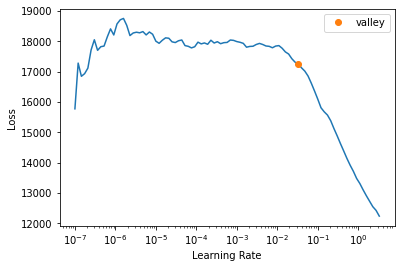

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  177.00     162.15
1   87.00     141.93
2  129.00      86.46
3   17.00      30.34
4  210.00     191.20
XGBoost RMSE:  46.33583


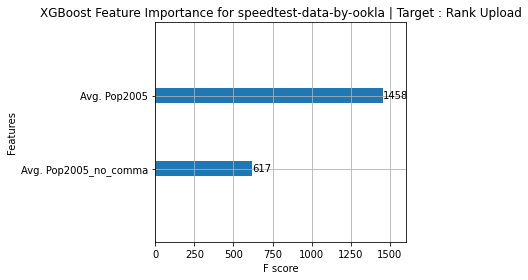

Target Variable: Avg Lat Ms
CATS=====================
['Avg. Pop2005', 'Avg. Pop2005_no_comma']
CONTS=====================
['Number of Records', 'Devices', 'Tests', 'Avg. Avg U Kbps', 'Avg. Avg D Kbps', 'Rank Upload', 'Rank Download', 'Rank Latency', 'Name_no_comma', 'Number of Records_no_comma', 'Devices_no_comma', 'Tests_no_comma', 'Avg. Avg U Kbps_no_comma', 'Avg. Avg D Kbps_no_comma', 'Number of Record_no_comma']
17
Could not convert Number of Records to float.
Could not convert Devices to float.
Could not convert Tests to float.
Could not convert Avg. Avg U Kbps to float.
Could not convert Avg. Avg D Kbps to float.
Could not convert Name_no_comma to float.
Looping through continuous variables to find breakpoint
Error with  Number of Records
Error with  Devices
Error with  Tests
Error with  Avg. Avg U Kbps
Error with  Avg. Avg D Kbps
Error with  Name_no_comma
Continuous variables that made the cut : ['Rank Upload', 'Rank Download', 'Rank Latency', 'Number of Records_no_comma', 'Dev

 10%|▉         | 4/42 [00:00<00:01, 35.96it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.39696128497269656, 'Adjusted R-Squared': 0.39564890474412795, 'RMSE': 83.6439634981281, 'Time taken': 0.03653693199157715}
{'Model': 'BaggingRegressor', 'R-Squared': 0.497651907860049, 'Adjusted R-Squared': 0.4965586584756313, 'RMSE': 76.34214971745159, 'Time taken': 0.05175948143005371}
{'Model': 'BayesianRidge', 'R-Squared': 0.07642805670060038, 'Adjusted R-Squared': 0.07441810687840367, 'RMSE': 103.51359030913798, 'Time taken': 0.009604692459106445}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.490565191529036, 'Adjusted R-Squared': 0.4894565194757804, 'RMSE': 76.87875019305271, 'Time taken': 0.012998580932617188}
{'Model': 'DummyRegressor', 'R-Squared': -0.003031806373256396, 'Adjusted R-Squared': -0.005214682992131792, 'RMSE': 107.87464, 'Time taken': 0.009091377258300781}
{'Model': 'ElasticNet', 'R-Squared': 0.05708637178797438, 'Adjusted R-Squared': 0.055034329071517396, 'RMSE': 104.59187843801378, 'Time taken': 0.007895946502685

 21%|██▏       | 9/42 [00:00<00:01, 21.22it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.490565191529036, 'Adjusted R-Squared': 0.4894565194757804, 'RMSE': 76.87875019305271, 'Time taken': 0.20291781425476074}
{'Model': 'GammaRegressor', 'R-Squared': 0.043990483734190344, 'Adjusted R-Squared': 0.04190994071728982, 'RMSE': 105.31569889089612, 'Time taken': 0.015051841735839844}


 29%|██▊       | 12/42 [00:01<00:05,  5.28it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.38913053812058185, 'Adjusted R-Squared': 0.3878011160055015, 'RMSE': 84.18529030464461, 'Time taken': 1.3118116855621338}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.04672052960698969, 'Adjusted R-Squared': 0.0446459279303999, 'RMSE': 105.16521804271036, 'Time taken': 0.01512908935546875}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.44094927018861774, 'Adjusted R-Squared': 0.4397326200693329, 'RMSE': 80.5355475723182, 'Time taken': 0.170363187789917}


 33%|███▎      | 14/42 [00:02<00:05,  4.83it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.4526462008050859, 'Adjusted R-Squared': 0.45145500646516223, 'RMSE': 79.6885775917694, 'Time taken': 0.34760618209838867}
{'Model': 'HuberRegressor', 'R-Squared': -0.06349954840404148, 'Adjusted R-Squared': -0.06581401967369116, 'RMSE': 111.07866751993484, 'Time taken': 0.016115427017211914}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4403351104169061, 'Adjusted R-Squared': 0.43911712371487543, 'RMSE': 80.57977, 'Time taken': 0.011423826217651367}


 50%|█████     | 21/42 [00:03<00:03,  6.26it/s]

{'Model': 'KernelRidge', 'R-Squared': -0.24718662277978454, 'Adjusted R-Squared': -0.2499008482918188, 'RMSE': 120.28950243577634, 'Time taken': 0.9359581470489502}
{'Model': 'Lars', 'R-Squared': 0.07699434974529218, 'Adjusted R-Squared': 0.07498563233450939, 'RMSE': 103.48185048905889, 'Time taken': 0.009730100631713867}
{'Model': 'LarsCV', 'R-Squared': 0.07699434974529218, 'Adjusted R-Squared': 0.07498563233450939, 'RMSE': 103.48185048905889, 'Time taken': 0.01626300811767578}
{'Model': 'Lasso', 'R-Squared': 0.07340188461867936, 'Adjusted R-Squared': 0.07138534900305082, 'RMSE': 103.683037724968, 'Time taken': 0.00965738296508789}
{'Model': 'LassoCV', 'R-Squared': 0.0769355157824988, 'Adjusted R-Squared': 0.07492667033262401, 'RMSE': 103.48514849179811, 'Time taken': 0.07732224464416504}
{'Model': 'LassoLars', 'R-Squared': -0.00303176014272033, 'Adjusted R-Squared': -0.005214636660985095, 'RMSE': 107.87463738779812, 'Time taken': 0.010123252868652344}
{'Model': 'LassoLarsCV', 'R-Squa

 64%|██████▍   | 27/42 [00:06<00:05,  2.81it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.1470480777887737, 'Adjusted R-Squared': 0.1451918168046361, 'RMSE': 99.4773672082719, 'Time taken': 3.441843271255493}


 69%|██████▉   | 29/42 [00:07<00:04,  2.88it/s]

{'Model': 'NuSVR', 'R-Squared': -0.012342941474818181, 'Adjusted R-Squared': -0.014546081717418335, 'RMSE': 108.37418288712519, 'Time taken': 0.607144832611084}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.05435920179374354, 'Adjusted R-Squared': 0.052301223995688595, 'RMSE': 104.74302371440287, 'Time taken': 0.01091456413269043}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.07699434974529218, 'Adjusted R-Squared': 0.07498563233450939, 'RMSE': 103.48185048905889, 'Time taken': 0.01654815673828125}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.07261915107964101, 'Adjusted R-Squared': -0.07495346914510259, 'RMSE': 111.553905591058, 'Time taken': 0.013145685195922852}
{'Model': 'PoissonRegressor', 'R-Squared': 0.09982985492921959, 'Adjusted R-Squared': 0.09787083393885887, 'RMSE': 102.19374367931186, 'Time taken': 0.014763593673706055}
{'Model': 'RANSACRegressor', 'R-Squared': -0.1268159177392305, 'Adjusted R-Squared': -0.1292681830661928, 'RMSE': 114.33744762

 81%|████████  | 34/42 [00:07<00:01,  4.04it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5006861154181625, 'Adjusted R-Squared': 0.4995994693146112, 'RMSE': 76.11124532286476, 'Time taken': 0.38286757469177246}
{'Model': 'Ridge', 'R-Squared': 0.07698240044214777, 'Adjusted R-Squared': 0.07497365702635272, 'RMSE': 103.48252032894506, 'Time taken': 0.01093602180480957}
{'Model': 'RidgeCV', 'R-Squared': 0.07687494764235225, 'Adjusted R-Squared': 0.0748659703793324, 'RMSE': 103.48854359596918, 'Time taken': 0.014356374740600586}
{'Model': 'SGDRegressor', 'R-Squared': 0.08387207082840564, 'Adjusted R-Squared': 0.08187832125458283, 'RMSE': 103.0955851932624, 'Time taken': 0.01569199562072754}


 98%|█████████▊| 41/42 [00:08<00:00,  5.57it/s]

{'Model': 'SVR', 'R-Squared': -0.013948873953187668, 'Adjusted R-Squared': -0.016155509152215197, 'RMSE': 108.4601086366182, 'Time taken': 0.6404945850372314}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.07699434974529218, 'Adjusted R-Squared': 0.07498563233450939, 'RMSE': 103.48185048905889, 'Time taken': 0.011436223983764648}
{'Model': 'TweedieRegressor', 'R-Squared': 0.04672052960698969, 'Adjusted R-Squared': 0.0446459279303999, 'RMSE': 105.16521804271036, 'Time taken': 0.009772300720214844}
{'Model': 'XGBRegressor', 'R-Squared': 0.4927724264021194, 'Adjusted R-Squared': 0.49166855790680297, 'RMSE': 76.71202, 'Time taken': 0.11766624450683594}


100%|██████████| 42/42 [00:08<00:00,  4.74it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.43698636486217646, 'Adjusted R-Squared': 0.43576109035697996, 'RMSE': 80.82048696739382, 'Time taken': 0.10840272903442383}
Project: speedtest-data-by-ookla
speedtest-data-by-ookla
Target: Avg Lat Ms
Avg Lat Ms
Target Standard Deviation: 91.98182678222656
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RandomForestRegressor                        0.50       0.50  76.11   
BaggingRegressor                             0.50       0.50  76.34   
XGBRegressor                                 0.49       0.49  76.71   
DecisionTreeRegressor                        0.49       0.49  76.88   
ExtraTreeRegressor                           0.49       0.49  76.88   
ExtraTreesRegressor                          0.49       0.49  76.88   
HistGradientBoostingRegressor                0.45       0.45  79.69   
GradientBoostingRegressor                    0.44       0.44  8

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,8905.958008,12799.593750,113.135292,00:02
1,7643.153320,12004.849609,109.566643,00:02
2,7036.841309,12208.964844,110.494186,00:02


Better model found at epoch 0 with _rmse value: 113.13529205322266.
Better model found at epoch 1 with _rmse value: 109.56664276123047.
No improvement since epoch 1: early stopping


,Avg. Pop2005,Avg. Pop2005_no_comma,Avg Lat Ms,Avg Lat Ms_pred
0,123.00,198.00,34.00,34.70
1,162.00,131.00,46.00,37.19
2,26.00,161.00,19.00,50.94
3,185.00,29.00,29.00,41.92
4,39.00,166.00,19.00,41.71
5,177.00,138.00,27.00,37.30
6,159.00,128.00,25.00,37.80
7,201.00,73.00,50.00,31.09
8,182.00,209.00,33.00,42.66


<Figure size 432x288 with 0 Axes>

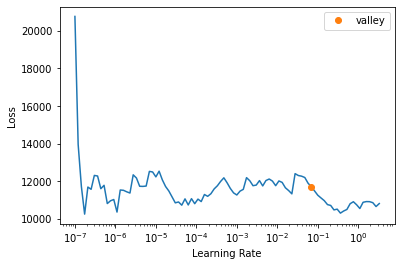

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   35.00      33.47
1   26.00      24.49
2    9.00      20.39
3   39.00      47.75
4   46.00      26.06
XGBoost RMSE:  76.71202


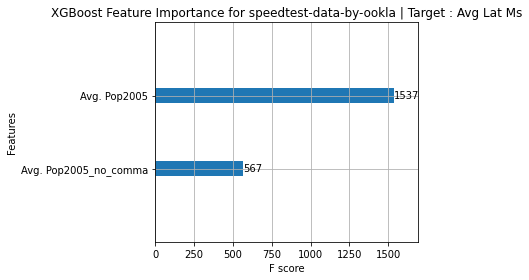

<Figure size 432x288 with 0 Axes>

In [17]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

                 feature  importance
0           Avg. Pop2005        1458
1  Avg. Pop2005_no_comma         617
0           Avg. Pop2005        1817
0  Avg. Pop2005_no_comma         567
1           Avg. Pop2005        1537


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

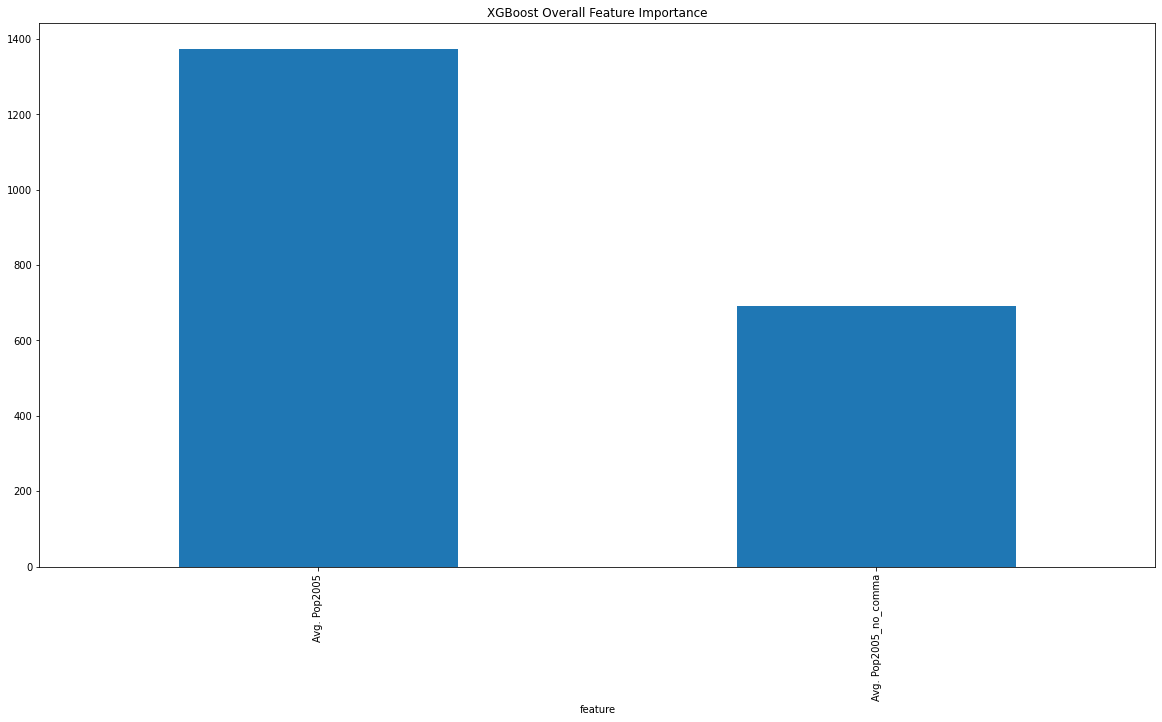

In [18]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [19]:
df.isna().sum()

Number of Records             0
Devices                       0
Tests                         0
Avg. Avg U Kbps               0
Avg. Avg D Kbps               0
Avg Lat Ms                    0
Avg. Pop2005                  0
Rank Upload                   0
Rank Download                 0
Rank Latency                  0
Name_no_comma                 0
Number of Records_no_comma    0
Devices_no_comma              0
Tests_no_comma                0
Avg. Avg U Kbps_no_comma      0
Avg. Avg D Kbps_no_comma      0
Avg. Pop2005_no_comma         0
Number of Record_no_comma     0
dtype: int64

# **To Be Continued...**